**This notebook contains basic familiarization of Pre-owned Condominiums,etc real estate data of Japan. Data quality issues, feature engineering opportunities and any other notable observations regarding data preprocessing have been explored. In addition, a preliminary Exploratory Data Analysis (EDA) has been conducted to describe relationships between different variables and Trade price.**

**Author: Aditi Namboodiripad**

**Date: 19/9/2023**

# Real estate dataset of Pre-owned Condominiums and others

## Table Of Contents

1.[Basic Analysis](#Basic-Analysis) <br>
2.[Dealing with nulls](#Dealing-with-nulls)<br>
3.[Dealing with Duplicates](#Dealing-with-Duplicates)<br>
4.[Further Data Cleaning](#Further-Data-Cleaning)<br>
5.[Univariate Analysis](#Univariate-Analysis)<br>
6.[Summary](#Summary)<br>

# Basic Analysis

Import all libraries

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import numpy as np

Reading the csv and setting max columns and rows that are to be displayed

In [2]:
df=pd.read_csv("Pre-owned Condominiums, etc..csv")
pd.options.display.max_columns=100
pd.options.display.max_rows = 999

Now lets check the first and last few rows

In [3]:
df.head()

,No,RealEstateType,SurroundingArea,CityCode,PrefectureName,CityName,DistrictName,NearestStation,TimeToNearestStationOriginal,MinTimeToNearestStation,MaxTimeToNearestStation,TradePriceYen,FloorPlan,SurveyedAreaM2,AreaIsGreaterFlag,UnitLandPricePerM2Yen,UnitLandPricePerTsuboYen,LandShape,FrontageM,FrontageIsGreaterFlag,TotalFloorAreaM2,TotalFloorAreaIsGreaterFlag,ConstructionYear,PrewarBuildingFlag,BuildingStructure,CurrentUsage,FutureUsePurpose,FrontageRoadDirection,FrontageRoadClassification,FrontageRoadBreadthM,CityPlanningCategory,MaxBuildingCoverageRatioPercent,MaxFloorAreaRatioPercent,TransactionPeriod,TransactionYear,TransactionYearQuarter,RenovationStatus,Notes
0,3,"Pre-owned Condominiums, etc.",NaN,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,20,20.0,20.0,19000000,4LDK,95,0,NaN,NaN,NaN,NaN,False,NaN,0,1997.0,0,RC,NaN,House,NaN,NaN,NaN,Neighborhood Commercial Zone,80.0,200.0,4th quarter 2018,2018,4,Not yet,NaN
1,10,"Pre-owned Condominiums, etc.",NaN,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,23,23.0,23.0,14000000,4LDK,90,0,NaN,NaN,NaN,NaN,False,NaN,0,1989.0,0,RC,House,House,NaN,NaN,NaN,Category I Exclusively Low-story Residential Zone,40.0,80.0,4th quarter 2017,2017,4,Not yet,NaN
2,14,"Pre-owned Condominiums, etc.",NaN,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,25,25.0,25.0,27000000,2LDK,80,0,NaN,NaN,NaN,NaN,False,NaN,0,2002.0,0,RC,House,NaN,NaN,NaN,NaN,Category I Residential Zone,60.0,200.0,2nd quarter 2010,2010,2,Not yet,NaN
3,20,"Pre-owned Condominiums, etc.",NaN,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,NaN,NaN,NaN,30000000,4LDK,120,0,NaN,NaN,NaN,NaN,False,NaN,0,2002.0,0,NaN,House,NaN,NaN,NaN,NaN,Category I Residential Zone,60.0,200.0,3rd quarter 2006,2006,3,Not yet,NaN
4,25,"Pre-owned Condominiums, etc.",NaN,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,0,0.0,0.0,19000000,4LDK,95,0,NaN,NaN,NaN,NaN,False,NaN,0,1997.0,0,RC,House,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1st quarter 2011,2011,1,Not yet,NaN


In [4]:
df.tail()

,No,RealEstateType,SurroundingArea,CityCode,PrefectureName,CityName,DistrictName,NearestStation,TimeToNearestStationOriginal,MinTimeToNearestStation,MaxTimeToNearestStation,TradePriceYen,FloorPlan,SurveyedAreaM2,AreaIsGreaterFlag,UnitLandPricePerM2Yen,UnitLandPricePerTsuboYen,LandShape,FrontageM,FrontageIsGreaterFlag,TotalFloorAreaM2,TotalFloorAreaIsGreaterFlag,ConstructionYear,PrewarBuildingFlag,BuildingStructure,CurrentUsage,FutureUsePurpose,FrontageRoadDirection,FrontageRoadClassification,FrontageRoadBreadthM,CityPlanningCategory,MaxBuildingCoverageRatioPercent,MaxFloorAreaRatioPercent,TransactionPeriod,TransactionYear,TransactionYearQuarter,RenovationStatus,Notes
617854,29892,"Pre-owned Condominiums, etc.",NaN,47211,Okinawa Prefecture,Okinawa City,Tobaru,NaN,NaN,NaN,NaN,5800000,3LDK,80,0,NaN,NaN,NaN,NaN,False,NaN,0,1985.0,0,RC,House,NaN,NaN,NaN,NaN,Non-divided City Planning Area,NaN,NaN,2nd quarter 2008,2008,2,Not yet,NaN
617855,29921,"Pre-owned Condominiums, etc.",NaN,47211,Okinawa Prefecture,Okinawa City,Aza Hiyagon,NaN,NaN,NaN,NaN,5000000,3LDK,60,0,NaN,NaN,NaN,NaN,False,NaN,0,1984.0,0,RC,House,NaN,NaN,NaN,NaN,Non-divided City Planning Area,70.0,200.0,3rd quarter 2006,2006,3,Not yet,NaN
617856,29959,"Pre-owned Condominiums, etc.",NaN,47211,Okinawa Prefecture,Okinawa City,Miyazato,NaN,NaN,NaN,NaN,6500000,4LDK,85,0,NaN,NaN,NaN,NaN,False,NaN,0,2001.0,0,RC,House,NaN,NaN,NaN,NaN,Non-divided City Planning Area,70.0,200.0,4th quarter 2008,2008,4,Not yet,Dealings in which auction or arbiter participates
617857,29997,"Pre-owned Condominiums, etc.",NaN,47211,Okinawa Prefecture,Okinawa City,Yamazato,NaN,NaN,NaN,NaN,7000000,3DK,55,0,NaN,NaN,NaN,NaN,False,NaN,0,1991.0,0,RC,House,NaN,NaN,NaN,NaN,Neighborhood Commercial Zone,80.0,300.0,1st quarter 2008,2008,1,Not yet,Dealings in which auction or arbiter participates
617858,30381,"Pre-owned Condominiums, etc.",NaN,47213,Okinawa Prefecture,Uruma City,Aza Kawasaki,NaN,NaN,NaN,NaN,4900000,2LDK,60,0,NaN,NaN,NaN,NaN,False,NaN,0,1986.0,0,RC,House,NaN,NaN,NaN,NaN,Non-divided City Planning Area,60.0,200.0,4th quarter 2007,2007,4,Not yet,Dealings in which auction or arbiter participates


Let us check a sample of rows

In [5]:
df.sample(50)

,No,RealEstateType,SurroundingArea,CityCode,PrefectureName,CityName,DistrictName,NearestStation,TimeToNearestStationOriginal,MinTimeToNearestStation,MaxTimeToNearestStation,TradePriceYen,FloorPlan,SurveyedAreaM2,AreaIsGreaterFlag,UnitLandPricePerM2Yen,UnitLandPricePerTsuboYen,LandShape,FrontageM,FrontageIsGreaterFlag,TotalFloorAreaM2,TotalFloorAreaIsGreaterFlag,ConstructionYear,PrewarBuildingFlag,BuildingStructure,CurrentUsage,FutureUsePurpose,FrontageRoadDirection,FrontageRoadClassification,FrontageRoadBreadthM,CityPlanningCategory,MaxBuildingCoverageRatioPercent,MaxFloorAreaRatioPercent,TransactionPeriod,TransactionYear,TransactionYearQuarter,RenovationStatus,Notes
204813,144301,"Pre-owned Condominiums, etc.",NaN,13115,Tokyo,Suginami Ward,Shoan,Nishiogikubo,10,10.0,10.0,63000000,1LDK,70,0,NaN,NaN,NaN,NaN,False,NaN,0,2010.0,0,S,House,House,NaN,NaN,NaN,Category I Exclusively Low-story Residential Zone,50.0,100.0,3rd quarter 2016,2016,3,Not yet,NaN
63915,110472,"Pre-owned Condominiums, etc.",NaN,11221,Saitama Prefecture,Soka City,Benten,Dokkyodaigakumae,19,19.0,19.0,14000000,3LDK,60,0,NaN,NaN,NaN,NaN,False,NaN,0,1995.0,0,SRC,NaN,NaN,NaN,NaN,NaN,Category I Residential Zone,60.0,200.0,1st quarter 2018,2018,1,Done,NaN
598283,87590,"Pre-owned Condominiums, etc.",NaN,40133,Fukuoka Prefecture,"Chuo Ward,Fukuoka City",Ozasa,Nishitetsuhirao,21,21.0,21.0,6500000,2LDK,60,0,NaN,NaN,NaN,NaN,False,NaN,0,1987.0,0,RC,House,NaN,NaN,NaN,NaN,Neighborhood Commercial Zone,80.0,300.0,2nd quarter 2013,2013,2,Not yet,NaN
203783,142116,"Pre-owned Condominiums, etc.",NaN,13111,Tokyo,Ota Ward,Omorinishi,Kamata,18,18.0,18.0,36000000,3DK,60,0,NaN,NaN,NaN,NaN,False,NaN,0,2009.0,0,RC,House,NaN,NaN,NaN,NaN,Quasi-industrial Zone,60.0,200.0,3rd quarter 2013,2013,3,Not yet,NaN
587152,24665,"Pre-owned Condominiums, etc.",NaN,40134,Fukuoka Prefecture,"Minami Ward,Fukuoka City",Mukaino,Ohashi (Fukuoka),8,8.0,8.0,13000000,2LDK,65,0,NaN,NaN,NaN,NaN,False,NaN,0,1989.0,0,RC,House,House,NaN,NaN,NaN,Category I Residential Zone,60.0,200.0,4th quarter 2014,2014,4,Not yet,NaN
55410,56043,"Pre-owned Condominiums, etc.",NaN,11203,Saitama Prefecture,Kawaguchi City,Minami Hatogaya,Minamihatogaya,4,4.0,4.0,30000000,3LDK,65,0,NaN,NaN,NaN,NaN,False,NaN,0,2005.0,0,RC,NaN,House,NaN,NaN,NaN,Category II Residential Zone,60.0,200.0,4th quarter 2017,2017,4,Done,NaN
385414,4820,"Pre-owned Condominiums, etc.",NaN,15103,Niigata Prefecture,"Chuo Ward,Niigata City",Nishiohatacho,Niigata,30-60minutes,30.0,60.0,30000000,3LDK,80,0,NaN,NaN,NaN,NaN,False,NaN,0,NaN,0,NaN,NaN,House,NaN,NaN,NaN,Category I Residential Zone,60.0,200.0,4th quarter 2018,2018,4,Not yet,NaN
318441,52021,"Pre-owned Condominiums, etc.",NaN,14103,Kanagawa Prefecture,"Nishi Ward,Yokohama City",Nishihiranumacho,Hiranumabashi,1,1.0,1.0,34000000,2LDK,65,0,NaN,NaN,NaN,NaN,False,NaN,0,2005.0,0,RC,House,NaN,NaN,NaN,NaN,Commercial Zone,80.0,400.0,4th quarter 2012,2012,4,Not yet,NaN
311047,31348,"Pre-owned Condominiums, etc.",NaN,14109,Kanagawa Prefecture,"Kohoku Ward,Yokohama City",Tsunashimahigashi,Tsunashima,12,12.0,12.0,36000000,3LDK,60,0,NaN,NaN,NaN,NaN,False,NaN,0,2007.0,0,RC,House,House,NaN,NaN,NaN,Category I Residential Zone,60.0,200.0,2nd quarter 2016,2016,2,Done,NaN
29058,20534,"Pre-owned Condominiums, etc.",NaN,4101,Miyagi Prefecture,"Aoba Ward,Sendai City",Kunimi,Kunimi (Miyagi),8,8.0,8.0,13000000,3LDK,65,0,NaN,NaN,NaN,NaN,False,NaN,0,2001.0,0,RC,House,NaN,NaN,NaN,NaN,Category I Exclusively Low-story Residential Zone,50.0,80.0,2nd quarter 2009,2009,2,Not yet,NaN


Let us check the number of rows and columns in the dataset

In [6]:
df.shape

(617859, 38)

Let us also look at the data types


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617859 entries, 0 to 617858
Data columns (total 38 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   No                               617859 non-null  int64  
 1   RealEstateType                   617859 non-null  object 
 2   SurroundingArea                  0 non-null       float64
 3   CityCode                         617859 non-null  int64  
 4   PrefectureName                   617859 non-null  object 
 5   CityName                         617859 non-null  object 
 6   DistrictName                     617569 non-null  object 
 7   NearestStation                   615272 non-null  object 
 8   TimeToNearestStationOriginal     594846 non-null  object 
 9   MinTimeToNearestStation          594846 non-null  float64
 10  MaxTimeToNearestStation          594037 non-null  float64
 11  TradePriceYen                    617859 non-null  int64  
 12  Fl

Let us check the null values

In [8]:
df.isna().sum()

No                                      0
RealEstateType                          0
SurroundingArea                    617859
CityCode                                0
PrefectureName                          0
CityName                                0
DistrictName                          290
NearestStation                       2587
TimeToNearestStationOriginal        23013
MinTimeToNearestStation             23013
MaxTimeToNearestStation             23822
TradePriceYen                           0
FloorPlan                           20689
SurveyedAreaM2                          0
AreaIsGreaterFlag                       0
UnitLandPricePerM2Yen              617859
UnitLandPricePerTsuboYen           617859
LandShape                          617859
FrontageM                          617859
FrontageIsGreaterFlag                   0
TotalFloorAreaM2                   617859
TotalFloorAreaIsGreaterFlag             0
ConstructionYear                    17526
PrewarBuildingFlag                

Percentage of null values from total dataset

In [9]:
df.isna().sum()/df.shape[0]*100

No                                   0.000000
RealEstateType                       0.000000
SurroundingArea                    100.000000
CityCode                             0.000000
PrefectureName                       0.000000
CityName                             0.000000
DistrictName                         0.046936
NearestStation                       0.418704
TimeToNearestStationOriginal         3.724636
MinTimeToNearestStation              3.724636
MaxTimeToNearestStation              3.855572
TradePriceYen                        0.000000
FloorPlan                            3.348499
SurveyedAreaM2                       0.000000
AreaIsGreaterFlag                    0.000000
UnitLandPricePerM2Yen              100.000000
UnitLandPricePerTsuboYen           100.000000
LandShape                          100.000000
FrontageM                          100.000000
FrontageIsGreaterFlag                0.000000
TotalFloorAreaM2                   100.000000
TotalFloorAreaIsGreaterFlag       

Here few columns have no values at all. Also dropping the `RealEstateType` column as there is only one type

In [10]:
df.drop(columns=['SurroundingArea','UnitLandPricePerM2Yen',
       'UnitLandPricePerTsuboYen', 'LandShape', 'FrontageM',
       'FrontageIsGreaterFlag', 'TotalFloorAreaM2',
       'TotalFloorAreaIsGreaterFlag','FrontageRoadDirection', 'FrontageRoadClassification',
       'FrontageRoadBreadthM','RealEstateType'], inplace=True)
df.head()

,No,CityCode,PrefectureName,CityName,DistrictName,NearestStation,TimeToNearestStationOriginal,MinTimeToNearestStation,MaxTimeToNearestStation,TradePriceYen,FloorPlan,SurveyedAreaM2,AreaIsGreaterFlag,ConstructionYear,PrewarBuildingFlag,BuildingStructure,CurrentUsage,FutureUsePurpose,CityPlanningCategory,MaxBuildingCoverageRatioPercent,MaxFloorAreaRatioPercent,TransactionPeriod,TransactionYear,TransactionYearQuarter,RenovationStatus,Notes
0,3,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,20,20.0,20.0,19000000,4LDK,95,0,1997.0,0,RC,NaN,House,Neighborhood Commercial Zone,80.0,200.0,4th quarter 2018,2018,4,Not yet,NaN
1,10,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,23,23.0,23.0,14000000,4LDK,90,0,1989.0,0,RC,House,House,Category I Exclusively Low-story Residential Zone,40.0,80.0,4th quarter 2017,2017,4,Not yet,NaN
2,14,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,25,25.0,25.0,27000000,2LDK,80,0,2002.0,0,RC,House,NaN,Category I Residential Zone,60.0,200.0,2nd quarter 2010,2010,2,Not yet,NaN
3,20,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,NaN,NaN,NaN,30000000,4LDK,120,0,2002.0,0,NaN,House,NaN,Category I Residential Zone,60.0,200.0,3rd quarter 2006,2006,3,Not yet,NaN
4,25,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,0,0.0,0.0,19000000,4LDK,95,0,1997.0,0,RC,House,NaN,NaN,NaN,NaN,1st quarter 2011,2011,1,Not yet,NaN


In [11]:
df.shape

(617859, 26)

In [12]:
df.isna().sum()/df.shape[0]*100

No                                  0.000000
CityCode                            0.000000
PrefectureName                      0.000000
CityName                            0.000000
DistrictName                        0.046936
NearestStation                      0.418704
TimeToNearestStationOriginal        3.724636
MinTimeToNearestStation             3.724636
MaxTimeToNearestStation             3.855572
TradePriceYen                       0.000000
FloorPlan                           3.348499
SurveyedAreaM2                      0.000000
AreaIsGreaterFlag                   0.000000
ConstructionYear                    2.836570
PrewarBuildingFlag                  0.000000
BuildingStructure                   2.042214
CurrentUsage                        6.454709
FutureUsePurpose                   58.455570
CityPlanningCategory                2.949378
MaxBuildingCoverageRatioPercent     3.571365
MaxFloorAreaRatioPercent            3.571365
TransactionPeriod                   0.000000
Transactio

# Dealing with nulls

Now let us deal with FutureUsePurpose, CurrentUsage and Notes

In [13]:
df[df['FutureUsePurpose'].notna()]

,No,CityCode,PrefectureName,CityName,DistrictName,NearestStation,TimeToNearestStationOriginal,MinTimeToNearestStation,MaxTimeToNearestStation,TradePriceYen,FloorPlan,SurveyedAreaM2,AreaIsGreaterFlag,ConstructionYear,PrewarBuildingFlag,BuildingStructure,CurrentUsage,FutureUsePurpose,CityPlanningCategory,MaxBuildingCoverageRatioPercent,MaxFloorAreaRatioPercent,TransactionPeriod,TransactionYear,TransactionYearQuarter,RenovationStatus,Notes
0,3,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,20,20.0,20.0,19000000,4LDK,95,0,1997.0,0,RC,NaN,House,Neighborhood Commercial Zone,80.0,200.0,4th quarter 2018,2018,4,Not yet,NaN
1,10,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,23,23.0,23.0,14000000,4LDK,90,0,1989.0,0,RC,House,House,Category I Exclusively Low-story Residential Zone,40.0,80.0,4th quarter 2017,2017,4,Not yet,NaN
6,32,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,25,25.0,25.0,11000000,3LDK,75,0,1989.0,0,RC,House,House,Category I Exclusively Low-story Residential Zone,40.0,80.0,1st quarter 2016,2016,1,Not yet,NaN
9,35,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,26,26.0,26.0,13000000,3LDK,80,0,1989.0,0,RC,House,Office,Category I Exclusively Low-story Residential Zone,40.0,60.0,4th quarter 2015,2015,4,Done,NaN
12,45,1101,Hokkaido,"Chuo Ward,Sapporo City",Odoorinishi,Odori,5,5.0,5.0,40000000,3LDK,75,0,2007.0,0,RC,House,House,Commercial Zone,80.0,600.0,3rd quarter 2018,2018,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617005,8411,47213,Okinawa Prefecture,Uruma City,Aza Gushikawa,NaN,NaN,NaN,NaN,4700000,3LDK,65,0,1989.0,0,RC,House,House,Non-divided City Planning Area,60.0,200.0,4th quarter 2015,2015,4,Not yet,NaN
617006,8446,47213,Okinawa Prefecture,Uruma City,Aza Shioya,NaN,NaN,NaN,NaN,15000000,3LDK,75,0,1999.0,0,RC,House,House,Non-divided City Planning Area,NaN,NaN,3rd quarter 2019,2019,3,Done,NaN
617007,8460,47213,Okinawa Prefecture,Uruma City,Aza Shioya,NaN,NaN,NaN,NaN,9500000,3LDK,75,0,1999.0,0,RC,House,House,Non-divided City Planning Area,60.0,200.0,4th quarter 2016,2016,4,Not yet,NaN
617009,8465,47213,Okinawa Prefecture,Uruma City,Aza Shioya,NaN,NaN,NaN,NaN,13000000,3LDK,75,0,1999.0,0,RC,House,House,Non-divided City Planning Area,60.0,100.0,1st quarter 2015,2015,1,Not yet,NaN


In [14]:
df['FutureUsePurpose'].value_counts()

FutureUsePurpose
House     238291
Other      14489
Office      2890
Shop        1016
Name: count, dtype: int64

Here for few rows the purpose of future use is not given so filling the missing values as 'Not mentioned'

In [15]:
# Filling null values in 'FutureUsePurpose' with 'Not mentioned'
df['FutureUsePurpose'].fillna('Not mentioned', inplace=True)

In [16]:
df[df['CurrentUsage'].notna()]

,No,CityCode,PrefectureName,CityName,DistrictName,NearestStation,TimeToNearestStationOriginal,MinTimeToNearestStation,MaxTimeToNearestStation,TradePriceYen,FloorPlan,SurveyedAreaM2,AreaIsGreaterFlag,ConstructionYear,PrewarBuildingFlag,BuildingStructure,CurrentUsage,FutureUsePurpose,CityPlanningCategory,MaxBuildingCoverageRatioPercent,MaxFloorAreaRatioPercent,TransactionPeriod,TransactionYear,TransactionYearQuarter,RenovationStatus,Notes
1,10,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,23,23.0,23.0,14000000,4LDK,90,0,1989.0,0,RC,House,House,Category I Exclusively Low-story Residential Zone,40.0,80.0,4th quarter 2017,2017,4,Not yet,NaN
2,14,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,25,25.0,25.0,27000000,2LDK,80,0,2002.0,0,RC,House,Not mentioned,Category I Residential Zone,60.0,200.0,2nd quarter 2010,2010,2,Not yet,NaN
3,20,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,NaN,NaN,NaN,30000000,4LDK,120,0,2002.0,0,NaN,House,Not mentioned,Category I Residential Zone,60.0,200.0,3rd quarter 2006,2006,3,Not yet,NaN
4,25,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,0,0.0,0.0,19000000,4LDK,95,0,1997.0,0,RC,House,Not mentioned,NaN,NaN,NaN,1st quarter 2011,2011,1,Not yet,NaN
5,31,1101,Hokkaido,"Chuo Ward,Sapporo City",Odoorinishi,Odori,4,4.0,4.0,29000000,2LDK,75,0,2007.0,0,RC,House,Not mentioned,Commercial Zone,80.0,600.0,3rd quarter 2009,2009,3,Not yet,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617854,29892,47211,Okinawa Prefecture,Okinawa City,Tobaru,NaN,NaN,NaN,NaN,5800000,3LDK,80,0,1985.0,0,RC,House,Not mentioned,Non-divided City Planning Area,NaN,NaN,2nd quarter 2008,2008,2,Not yet,NaN
617855,29921,47211,Okinawa Prefecture,Okinawa City,Aza Hiyagon,NaN,NaN,NaN,NaN,5000000,3LDK,60,0,1984.0,0,RC,House,Not mentioned,Non-divided City Planning Area,70.0,200.0,3rd quarter 2006,2006,3,Not yet,NaN
617856,29959,47211,Okinawa Prefecture,Okinawa City,Miyazato,NaN,NaN,NaN,NaN,6500000,4LDK,85,0,2001.0,0,RC,House,Not mentioned,Non-divided City Planning Area,70.0,200.0,4th quarter 2008,2008,4,Not yet,Dealings in which auction or arbiter participates
617857,29997,47211,Okinawa Prefecture,Okinawa City,Yamazato,NaN,NaN,NaN,NaN,7000000,3DK,55,0,1991.0,0,RC,House,Not mentioned,Neighborhood Commercial Zone,80.0,300.0,1st quarter 2008,2008,1,Not yet,Dealings in which auction or arbiter participates


In [17]:
df['CurrentUsage'].value_counts()

CurrentUsage
House                               570607
Office                                3464
Shop                                  2812
Other                                  763
Parking Lot                             95
Office, Shop                            55
House, Shop                             53
Warehouse                               53
House, Office                           32
House, Other                            15
Factory                                  7
House, Parking Lot                       4
Warehouse, Shop                          3
Warehouse, Parking Lot                   3
Office, Warehouse                        2
Shop, Other                              2
Workshop                                 2
Parking Lot, Shop                        2
Office, Parking Lot                      1
House, Warehouse                         1
House, Office, Parking Lot, Shop         1
House, Shop, Other                       1
Name: count, dtype: int64

Here for few rows the CurrentUsage is not given so filling the missing values as 'Not mentioned'

In [18]:
df['CurrentUsage'].fillna('Not mentioned', inplace=True)

In [19]:
df[df['Notes'].notna()]

,No,CityCode,PrefectureName,CityName,DistrictName,NearestStation,TimeToNearestStationOriginal,MinTimeToNearestStation,MaxTimeToNearestStation,TradePriceYen,FloorPlan,SurveyedAreaM2,AreaIsGreaterFlag,ConstructionYear,PrewarBuildingFlag,BuildingStructure,CurrentUsage,FutureUsePurpose,CityPlanningCategory,MaxBuildingCoverageRatioPercent,MaxFloorAreaRatioPercent,TransactionPeriod,TransactionYear,TransactionYearQuarter,RenovationStatus,Notes
116,191,1101,Hokkaido,"Chuo Ward,Sapporo City",Odoorinishi,Nishi 18-chome,2,2.0,2.0,2600000,1K,20,0,1989.0,0,RC,House,Not mentioned,Commercial Zone,80.0,400.0,4th quarter 2007,2007,4,Not yet,Dealings in which auction or arbiter participates
182,268,1101,Hokkaido,"Chuo Ward,Sapporo City",Odoorinishi,Nishi 18-chome,0,0.0,0.0,1400000,1DK,30,0,1977.0,0,SRC,House,Not mentioned,Commercial Zone,80.0,400.0,4th quarter 2013,2013,4,Not yet,Dealings in which auction or arbiter participates
183,269,1101,Hokkaido,"Chuo Ward,Sapporo City",Odoorinishi,Nishi 18-chome,2,2.0,2.0,65000000,2LDK,50,0,1989.0,0,RC,House,Not mentioned,Commercial Zone,80.0,400.0,2nd quarter 2007,2007,2,Not yet,Dealings in which auction or arbiter participates
187,274,1101,Hokkaido,"Chuo Ward,Sapporo City",Odoorinishi,Nishi 18-chome,3,3.0,3.0,1700000,1K,20,0,1981.0,0,RC,House,Not mentioned,Commercial Zone,80.0,400.0,1st quarter 2012,2012,1,Not yet,Dealings including special circumstances
252,362,1101,Hokkaido,"Chuo Ward,Sapporo City",Odoorinishi,Maruyamakoen,1,1.0,1.0,1900000,1DK,15,0,1991.0,0,SRC,House,Not mentioned,Neighborhood Commercial Zone,80.0,300.0,2nd quarter 2011,2011,2,Done,Dealings in which auction or arbiter participates
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617852,29859,47211,Okinawa Prefecture,Okinawa City,Takahara,NaN,NaN,NaN,NaN,6800000,4LDK,65,0,1994.0,0,RC,House,Not mentioned,Category II Residential Zone,60.0,200.0,3rd quarter 2007,2007,3,Not yet,Dealings in which auction or arbiter participates
617853,29860,47211,Okinawa Prefecture,Okinawa City,Takahara,NaN,NaN,NaN,NaN,5400000,4LDK,60,0,1994.0,0,RC,House,Not mentioned,Category II Residential Zone,60.0,200.0,3rd quarter 2007,2007,3,Not yet,Dealings in which auction or arbiter participates
617856,29959,47211,Okinawa Prefecture,Okinawa City,Miyazato,NaN,NaN,NaN,NaN,6500000,4LDK,85,0,2001.0,0,RC,House,Not mentioned,Non-divided City Planning Area,70.0,200.0,4th quarter 2008,2008,4,Not yet,Dealings in which auction or arbiter participates
617857,29997,47211,Okinawa Prefecture,Okinawa City,Yamazato,NaN,NaN,NaN,NaN,7000000,3DK,55,0,1991.0,0,RC,House,Not mentioned,Neighborhood Commercial Zone,80.0,300.0,1st quarter 2008,2008,1,Not yet,Dealings in which auction or arbiter participates


In [20]:
df['Notes'].value_counts()

Notes
Dealings in which auction or arbiter participates                                                           17015
Dealings between related objects                                                                              854
Dealings including special circumstances                                                                       86
Dealings of real estate that includes wound etc.                                                               64
Dealings of real estate to which mortgage etc. are set                                                         46
Dealings in which auction or arbiter participates,Dealings of real estate that includes wound etc.              2
Dealings of real estate to which mortgage etc. are set,Dealings in which auction or arbiter participates        2
Dealings between related objects,Dealings in which auction or arbiter participates                              2
Dealings between related objects,Dealings of real estate that includes wound etc. 

Here for few rows for Notes(About dealings) are not given so filling the missing values as 'No dealings mentioned'

In [21]:
# Filling null values in 'Notes' with 'No dealings mentioned'
df['Notes'].fillna('No dealings mentioned', inplace=True)

Drop `TransactionPeriod` because it is redundant in `TransactionYearQuarter` and `TransactionYear`

In [22]:
df.drop(columns=['TransactionPeriod'], inplace=True)

In [23]:
df.head()

,No,CityCode,PrefectureName,CityName,DistrictName,NearestStation,TimeToNearestStationOriginal,MinTimeToNearestStation,MaxTimeToNearestStation,TradePriceYen,FloorPlan,SurveyedAreaM2,AreaIsGreaterFlag,ConstructionYear,PrewarBuildingFlag,BuildingStructure,CurrentUsage,FutureUsePurpose,CityPlanningCategory,MaxBuildingCoverageRatioPercent,MaxFloorAreaRatioPercent,TransactionYear,TransactionYearQuarter,RenovationStatus,Notes
0,3,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,20,20.0,20.0,19000000,4LDK,95,0,1997.0,0,RC,Not mentioned,House,Neighborhood Commercial Zone,80.0,200.0,2018,4,Not yet,No dealings mentioned
1,10,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,23,23.0,23.0,14000000,4LDK,90,0,1989.0,0,RC,House,House,Category I Exclusively Low-story Residential Zone,40.0,80.0,2017,4,Not yet,No dealings mentioned
2,14,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,25,25.0,25.0,27000000,2LDK,80,0,2002.0,0,RC,House,Not mentioned,Category I Residential Zone,60.0,200.0,2010,2,Not yet,No dealings mentioned
3,20,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,NaN,NaN,NaN,30000000,4LDK,120,0,2002.0,0,NaN,House,Not mentioned,Category I Residential Zone,60.0,200.0,2006,3,Not yet,No dealings mentioned
4,25,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,0,0.0,0.0,19000000,4LDK,95,0,1997.0,0,RC,House,Not mentioned,NaN,NaN,NaN,2011,1,Not yet,No dealings mentioned


In [24]:
df.isna().sum()

No                                     0
CityCode                               0
PrefectureName                         0
CityName                               0
DistrictName                         290
NearestStation                      2587
TimeToNearestStationOriginal       23013
MinTimeToNearestStation            23013
MaxTimeToNearestStation            23822
TradePriceYen                          0
FloorPlan                          20689
SurveyedAreaM2                         0
AreaIsGreaterFlag                      0
ConstructionYear                   17526
PrewarBuildingFlag                     0
BuildingStructure                  12618
CurrentUsage                           0
FutureUsePurpose                       0
CityPlanningCategory               18223
MaxBuildingCoverageRatioPercent    22066
MaxFloorAreaRatioPercent           22066
TransactionYear                        0
TransactionYearQuarter                 0
RenovationStatus                   54463
Notes           

In [25]:
df.isna().sum()/df.shape[0]*100

No                                 0.000000
CityCode                           0.000000
PrefectureName                     0.000000
CityName                           0.000000
DistrictName                       0.046936
NearestStation                     0.418704
TimeToNearestStationOriginal       3.724636
MinTimeToNearestStation            3.724636
MaxTimeToNearestStation            3.855572
TradePriceYen                      0.000000
FloorPlan                          3.348499
SurveyedAreaM2                     0.000000
AreaIsGreaterFlag                  0.000000
ConstructionYear                   2.836570
PrewarBuildingFlag                 0.000000
BuildingStructure                  2.042214
CurrentUsage                       0.000000
FutureUsePurpose                   0.000000
CityPlanningCategory               2.949378
MaxBuildingCoverageRatioPercent    3.571365
MaxFloorAreaRatioPercent           3.571365
TransactionYear                    0.000000
TransactionYearQuarter          

In [26]:
df.shape

(617859, 25)

In [27]:
# Rows where 'RenovationStatus' is null
renovation_null_rows = df[df['RenovationStatus'].isna()]
# value counts of 'CurrentUsage' for the filtered rows
current_usage_counts = renovation_null_rows['CurrentUsage'].value_counts()
#Value counts of CurrentUsage for RenovationStatus is null
print(current_usage_counts)


CurrentUsage
House                47557
Not mentioned         5942
Shop                   398
Office                 349
Other                  147
Parking Lot             37
Warehouse               10
Office, Shop             9
House, Shop              6
House, Office            2
House, Other             2
Warehouse, Shop          1
Parking Lot, Shop        1
Factory                  1
Shop, Other              1
Name: count, dtype: int64


The above EDA was to check if there was a relation between Renovation Status and current usage. It was to check if there was a certain category of building that had Renovation status as null. But doesn't seem to have a pattern

In [28]:
df['RenovationStatus'].value_counts()

RenovationStatus
Not yet    406925
Done       156471
Name: count, dtype: int64

In [29]:
df.isna().sum()

No                                     0
CityCode                               0
PrefectureName                         0
CityName                               0
DistrictName                         290
NearestStation                      2587
TimeToNearestStationOriginal       23013
MinTimeToNearestStation            23013
MaxTimeToNearestStation            23822
TradePriceYen                          0
FloorPlan                          20689
SurveyedAreaM2                         0
AreaIsGreaterFlag                      0
ConstructionYear                   17526
PrewarBuildingFlag                     0
BuildingStructure                  12618
CurrentUsage                           0
FutureUsePurpose                       0
CityPlanningCategory               18223
MaxBuildingCoverageRatioPercent    22066
MaxFloorAreaRatioPercent           22066
TransactionYear                        0
TransactionYearQuarter                 0
RenovationStatus                   54463
Notes           

In [30]:
# plt.figure(figsize=(10, 6))
# plt.scatter(df['SurveyedAreaM2'], df['MaxBuildingCoverageRatioPercent'])
# plt.title('Scatter Plot: Surveyed Area vs. Max Building Coverage Ratio')
# plt.xlabel('Surveyed Area (m^2)')
# plt.ylabel('Max Building Coverage Ratio (%)')
# plt.show()

So I just require a single time value called Time to nearest station instead of Max and min values for time to nearest sttion for analysis. I will just take the max time to reach the nearest station as a standard value. and fill the empty `MaxTimeToNearestStation` with the `MinTimeToNearestStation` because in the original data it just has a single time andd has no min-max times.


In [31]:
df['MaxTimeToNearestStation'].fillna(df['MinTimeToNearestStation'], inplace=True)
df.drop(columns=["TimeToNearestStationOriginal","MinTimeToNearestStation"],inplace=True)
df.isna().sum()

No                                     0
CityCode                               0
PrefectureName                         0
CityName                               0
DistrictName                         290
NearestStation                      2587
MaxTimeToNearestStation            23013
TradePriceYen                          0
FloorPlan                          20689
SurveyedAreaM2                         0
AreaIsGreaterFlag                      0
ConstructionYear                   17526
PrewarBuildingFlag                     0
BuildingStructure                  12618
CurrentUsage                           0
FutureUsePurpose                       0
CityPlanningCategory               18223
MaxBuildingCoverageRatioPercent    22066
MaxFloorAreaRatioPercent           22066
TransactionYear                        0
TransactionYearQuarter                 0
RenovationStatus                   54463
Notes                                  0
dtype: int64

In [32]:
df.dropna(subset = ["MaxTimeToNearestStation"], inplace=True)
df.isna().sum()

No                                     0
CityCode                               0
PrefectureName                         0
CityName                               0
DistrictName                         250
NearestStation                         0
MaxTimeToNearestStation                0
TradePriceYen                          0
FloorPlan                          19773
SurveyedAreaM2                         0
AreaIsGreaterFlag                      0
ConstructionYear                   16313
PrewarBuildingFlag                     0
BuildingStructure                   9193
CurrentUsage                           0
FutureUsePurpose                       0
CityPlanningCategory                9858
MaxBuildingCoverageRatioPercent    13573
MaxFloorAreaRatioPercent           13573
TransactionYear                        0
TransactionYearQuarter                 0
RenovationStatus                   51906
Notes                                  0
dtype: int64

Japan's main level of administaration is prefectures. The administrative structure can differ from one place to another in Japan, and not all cities have associated district names and vice versa. The specific naming conventions and divisions are determined by local government authorities and can vary based on historical, geographical, and administrative factors.

In [33]:
Area_cols=['DistrictName','CityCode','CityName','PrefectureName']
print("Unique values in each of the Area related cols:\n")
for i in Area_cols:
    print(i)
    print(df[i].nunique())

Unique values in each of the Area related cols:

DistrictName
11950
CityCode
606
CityName
605
PrefectureName
47


Hence just using prefectures is less ambiguous and for now not looking into more granularity. For now just dropping DistrictNames,CityCode and CityName columns.

In [34]:
df.drop(columns=['DistrictName','CityCode','CityName'], inplace=True)
df.isna().sum()

No                                     0
PrefectureName                         0
NearestStation                         0
MaxTimeToNearestStation                0
TradePriceYen                          0
FloorPlan                          19773
SurveyedAreaM2                         0
AreaIsGreaterFlag                      0
ConstructionYear                   16313
PrewarBuildingFlag                     0
BuildingStructure                   9193
CurrentUsage                           0
FutureUsePurpose                       0
CityPlanningCategory                9858
MaxBuildingCoverageRatioPercent    13573
MaxFloorAreaRatioPercent           13573
TransactionYear                        0
TransactionYearQuarter                 0
RenovationStatus                   51906
Notes                                  0
dtype: int64

Now it is difficult to impute the nearest station without Latitude and Longitude to any building so dropping the nulls in it.

In [35]:
df.dropna(subset = ['NearestStation'], inplace=True)
df.isna().sum()

No                                     0
PrefectureName                         0
NearestStation                         0
MaxTimeToNearestStation                0
TradePriceYen                          0
FloorPlan                          19773
SurveyedAreaM2                         0
AreaIsGreaterFlag                      0
ConstructionYear                   16313
PrewarBuildingFlag                     0
BuildingStructure                   9193
CurrentUsage                           0
FutureUsePurpose                       0
CityPlanningCategory                9858
MaxBuildingCoverageRatioPercent    13573
MaxFloorAreaRatioPercent           13573
TransactionYear                        0
TransactionYearQuarter                 0
RenovationStatus                   51906
Notes                                  0
dtype: int64

To impute the values in `MaxTimeToNearestStation` first group by the `NearestStation` and find the corresponding mean time for those stations and then impute that mean to matching `MaxTimeToNearestStation`.

In [36]:
# Group by 'NearestStation' and calculate the mean of 'MaxTimeToNearestStation'
mean_max_time_by_station = df.groupby('NearestStation')['MaxTimeToNearestStation'].mean()
print(mean_max_time_by_station)

NearestStation
Abekawa                    20.571429
Abeno                       3.962199
Abeyamakoen                 9.339623
Abiko                       9.242836
Abikocho                    5.518519
                             ...    
Zeze                       10.596591
Zoshigaya (Tokyo Metro)     4.450758
Zoshiki                     8.584711
Zuiko 4-chome               7.089888
Zushi                      55.537433
Name: MaxTimeToNearestStation, Length: 3757, dtype: float64


These are the grouping of each Station and their times. Fillng missing values in 'MaxTimeToNearestStation' based on the mean values from this mapping.

In [37]:
# Filling missing values in 'MaxTimeToNearestStation' based on the mean values
df['MaxTimeToNearestStation'].fillna(df['NearestStation'].map(mean_max_time_by_station), inplace=True)
df.isna().sum()

No                                     0
PrefectureName                         0
NearestStation                         0
MaxTimeToNearestStation                0
TradePriceYen                          0
FloorPlan                          19773
SurveyedAreaM2                         0
AreaIsGreaterFlag                      0
ConstructionYear                   16313
PrewarBuildingFlag                     0
BuildingStructure                   9193
CurrentUsage                           0
FutureUsePurpose                       0
CityPlanningCategory                9858
MaxBuildingCoverageRatioPercent    13573
MaxFloorAreaRatioPercent           13573
TransactionYear                        0
TransactionYearQuarter                 0
RenovationStatus                   51906
Notes                                  0
dtype: int64

In [38]:
df.rename(columns={'MaxTimeToNearestStation': 'TimeToNearestStation'}, inplace=True)

Identify the unique categories of `FloorPlan` that are most common for different ranges or bins of `SurveyedAreaM2`.
For each unique `FloorPlan` category, calculate the most frequent 'SurveyedAreaM2' range or bin.
Fill missing values in `FloorPlan` based on the most common 'FloorPlan' category for the corresponding `SurveyedAreaM2` range.

In [39]:
# Bin edges for 'SurveyedAreaM2'
bin_edges = [0, 250, 500, 1000, 1250, 1500,1750,2000] 

# New column 'SurveyedAreaM2_Bin' to represent bins
df['SurveyedAreaM2_Bin'] = pd.cut(df['SurveyedAreaM2'], bin_edges)
#print(df['SurveyedAreaM2_Bin'])

def get_mode_or_default(group, default_value):
    try:
        #Filtering out 'Unknown' values within the group
        valid_values = group[group != 'Unknown']
        # Mode for the remaining valid values
        mode_value = valid_values.mode().iloc[0]
        #Returning the calculated mode
        return mode_value
    except IndexError:
        #If there is no mode (e.g., all values are 'Unknown'), return the default value
        return default_value

# Most frequent 'FloorPlan' category for each 'SurveyedAreaM2' bin
# The function takes each group 'x' and calculates the most frequent 'FloorPlan' category for that group using the get_mode_or_default function. 
most_frequent_floorplan=df.groupby('SurveyedAreaM2_Bin')['FloorPlan'].apply(lambda x: get_mode_or_default(x, default_value='Unknown'))
print(most_frequent_floorplan)

# Filling missing values in 'FloorPlan' based on the most frequent category for each 'SurveyedAreaM2' bin
df['FloorPlan'] = df['FloorPlan'].fillna(df['SurveyedAreaM2_Bin'].map(most_frequent_floorplan))
df.isna().sum()


SurveyedAreaM2_Bin
(0, 250]              3LDK
(250, 500]      Open Floor
(500, 1000]     Open Floor
(1000, 1250]    Open Floor
(1250, 1500]    Open Floor
(1500, 1750]       Unknown
(1750, 2000]    Open Floor
Name: FloorPlan, dtype: object


No                                     0
PrefectureName                         0
NearestStation                         0
TimeToNearestStation                   0
TradePriceYen                          0
FloorPlan                              0
SurveyedAreaM2                         0
AreaIsGreaterFlag                      0
ConstructionYear                   16313
PrewarBuildingFlag                     0
BuildingStructure                   9193
CurrentUsage                           0
FutureUsePurpose                       0
CityPlanningCategory                9858
MaxBuildingCoverageRatioPercent    13573
MaxFloorAreaRatioPercent           13573
TransactionYear                        0
TransactionYearQuarter                 0
RenovationStatus                   51906
Notes                                  0
SurveyedAreaM2_Bin                     0
dtype: int64

Let us look at Rennovation status now

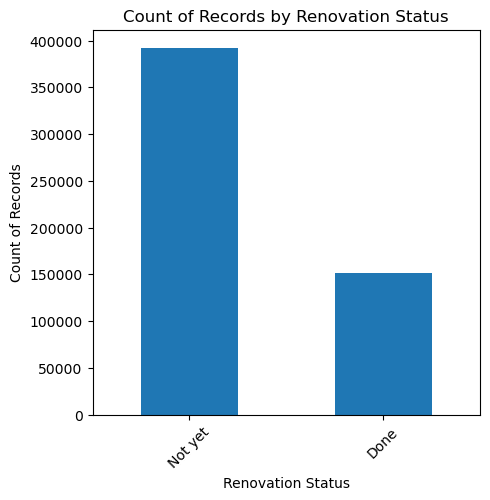

In [40]:
# Counting the number of records for each unique 'RenovationStatus' value
renovation_counts = df['RenovationStatus'].value_counts()

plt.figure(figsize=(5, 5))
renovation_counts.plot(kind='bar')
plt.title('Count of Records by Renovation Status')
plt.xlabel('Renovation Status')
plt.ylabel('Count of Records')
plt.xticks(rotation=45)
plt.show()


In [41]:
# Filling null values in 'RenovationStatus' with 'No status mentioned'
df['RenovationStatus'].fillna('No status mentioned', inplace=True)
df.isna().sum()

No                                     0
PrefectureName                         0
NearestStation                         0
TimeToNearestStation                   0
TradePriceYen                          0
FloorPlan                              0
SurveyedAreaM2                         0
AreaIsGreaterFlag                      0
ConstructionYear                   16313
PrewarBuildingFlag                     0
BuildingStructure                   9193
CurrentUsage                           0
FutureUsePurpose                       0
CityPlanningCategory                9858
MaxBuildingCoverageRatioPercent    13573
MaxFloorAreaRatioPercent           13573
TransactionYear                        0
TransactionYearQuarter                 0
RenovationStatus                       0
Notes                                  0
SurveyedAreaM2_Bin                     0
dtype: int64

In [42]:
df["RenovationStatus"].value_counts(dropna=False)

RenovationStatus
Not yet                391904
Done                   151036
No status mentioned     51906
Name: count, dtype: int64

Here I am finding the median of `MaxBuildingCoverageRatioPercent`and `MaxFloorAreaRatioPercent` for each `Floor plan` and `SurroundingAreaM2`group.Taking median because it is less sensitive to outliers compared to the mean provides a more robust measure of central tendency.

Then filling the missing value in `MaxBuildingCoverageRatioPercent`and `MaxFloorAreaRatioPercent` with the median looking at the `Floor plan` and `SurroundingAreaM2`group. Now certain combinations can have nulls. Like in this:

4LDK              (0, 250]              60.0

                  (250, 500]            60.0
                  
                  (500, 1000]           70.0
                  
                  (1000, 1250]           NaN (null combination)
                  
                  (1250, 1500]           NaN (null combination)
                  
                  (1500, 1750]           NaN (null combination)
                  
                  (1750, 2000]           NaN (null combination)
                  
                  
It will remain null for such cases.In such cases I will drop the rows because then that is an outlier. 
                  
                  

In [43]:
# Bin edges for 'SurveyedAreaM2'
bin_edges = [0, 250, 500, 1000, 1250, 1500, 1750, 2000]

# New column 'SurveyedAreaM2_Bin' to represent bins
df['SurveyedAreaM2_Bin'] = pd.cut(df['SurveyedAreaM2'], bins=bin_edges)

# Grouping the data by 'FloorPlan' and 'SurveyedAreaM2_Bin'
grouped_data = df.groupby(['FloorPlan', 'SurveyedAreaM2_Bin'])

# Calculating the median 'MaxBuildingCoverageRatioPercent' and 'MaxFloorAreaRatioPercent' for each group
median_max_building_coverage = grouped_data['MaxBuildingCoverageRatioPercent'].median()
median_max_floor_area = grouped_data['MaxFloorAreaRatioPercent'].median()
#print(median_max_building_coverage)
#print(median_max_floor_area)

# Filling null values in 'MaxBuildingCoverageRatioPercent' and 'MaxFloorAreaRatioPercent' based on the group medians
df['MaxBuildingCoverageRatioPercent'].fillna(df.set_index(['FloorPlan', 'SurveyedAreaM2_Bin'])['MaxBuildingCoverageRatioPercent'].fillna(median_max_building_coverage).reset_index()['MaxBuildingCoverageRatioPercent'], inplace=True)
df['MaxFloorAreaRatioPercent'].fillna(df.set_index(['FloorPlan', 'SurveyedAreaM2_Bin'])['MaxFloorAreaRatioPercent'].fillna(median_max_floor_area).reset_index()['MaxFloorAreaRatioPercent'], inplace=True)
df.isna().sum()

No                                     0
PrefectureName                         0
NearestStation                         0
TimeToNearestStation                   0
TradePriceYen                          0
FloorPlan                              0
SurveyedAreaM2                         0
AreaIsGreaterFlag                      0
ConstructionYear                   16313
PrewarBuildingFlag                     0
BuildingStructure                   9193
CurrentUsage                           0
FutureUsePurpose                       0
CityPlanningCategory                9858
MaxBuildingCoverageRatioPercent     1935
MaxFloorAreaRatioPercent            1935
TransactionYear                        0
TransactionYearQuarter                 0
RenovationStatus                       0
Notes                                  0
SurveyedAreaM2_Bin                     0
dtype: int64

Checking if I can fill the `ConstructionYear` with `BuildingStructure`.

In [44]:
df.dropna(subset = ["MaxBuildingCoverageRatioPercent","MaxFloorAreaRatioPercent"], inplace=True)
df.isna().sum()

No                                     0
PrefectureName                         0
NearestStation                         0
TimeToNearestStation                   0
TradePriceYen                          0
FloorPlan                              0
SurveyedAreaM2                         0
AreaIsGreaterFlag                      0
ConstructionYear                   15807
PrewarBuildingFlag                     0
BuildingStructure                   9032
CurrentUsage                           0
FutureUsePurpose                       0
CityPlanningCategory                8194
MaxBuildingCoverageRatioPercent        0
MaxFloorAreaRatioPercent               0
TransactionYear                        0
TransactionYearQuarter                 0
RenovationStatus                       0
Notes                                  0
SurveyedAreaM2_Bin                     0
dtype: int64

In [45]:
contingency_table = pd.crosstab(df['ConstructionYear'], df['BuildingStructure'])
from scipy.stats import chi2_contingency

chi2, p, _, _ = chi2_contingency(contingency_table)
print("{:.17f}".format(p))


0.00000000000000000


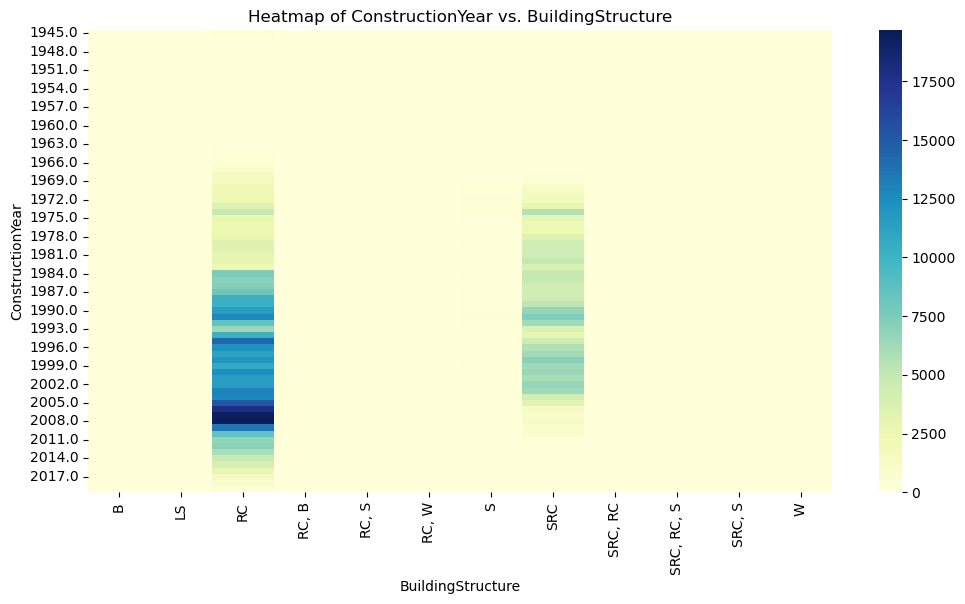

In [46]:
plt.figure(figsize=(12, 6))
sns.heatmap(contingency_table, cmap='YlGnBu')
plt.title('Heatmap of ConstructionYear vs. BuildingStructure')
plt.show()

In [47]:
df["BuildingStructure"].value_counts()

BuildingStructure
RC            404831
SRC           173935
S               4013
SRC, RC          589
RC, S            261
SRC, S           132
W                 76
B                 20
LS                18
SRC, RC, S         2
RC, B              1
RC, W              1
Name: count, dtype: int64

In [48]:
# Grouping the data by 'ConstructionYear' and getting the unique 'BuildingStructure' values
construction_year_building_structure = df.groupby('ConstructionYear')['BuildingStructure'].unique()

# Calculating the most popular 'BuildingStructure' for each year
most_popular_structure = df.groupby('ConstructionYear')['BuildingStructure'].agg(lambda x: x.value_counts().idxmax())

result = pd.DataFrame({'ConstructionYear': most_popular_structure.index, 'MostPopularBuildingStructure': most_popular_structure.values})
print(result)

    ConstructionYear MostPopularBuildingStructure
0             1945.0                           RC
1             1946.0                           RC
2             1947.0                           RC
3             1948.0                           RC
4             1949.0                           RC
5             1950.0                           RC
6             1951.0                          SRC
7             1952.0                           RC
8             1953.0                          SRC
9             1954.0                           RC
10            1955.0                           RC
11            1956.0                           RC
12            1957.0                           RC
13            1958.0                          SRC
14            1959.0                          SRC
15            1960.0                          SRC
16            1961.0                           RC
17            1962.0                           RC
18            1963.0                           RC


With the `BuildingStructure` given I cannot fill the `ConstructionYear` as it can be any one of these years but I may do **vice versa**.

Filling `BuildingStructure` with `ConstructionYear`

In [49]:
# replacing missing 'BuildingStructure' values with the mode for their corresponding 'ConstructionYear'
df['BuildingStructure'] = df['BuildingStructure'].fillna(df['ConstructionYear'].map(most_popular_structure))
df.isna().sum()

No                                     0
PrefectureName                         0
NearestStation                         0
TimeToNearestStation                   0
TradePriceYen                          0
FloorPlan                              0
SurveyedAreaM2                         0
AreaIsGreaterFlag                      0
ConstructionYear                   15807
PrewarBuildingFlag                     0
BuildingStructure                   2186
CurrentUsage                           0
FutureUsePurpose                       0
CityPlanningCategory                8194
MaxBuildingCoverageRatioPercent        0
MaxFloorAreaRatioPercent               0
TransactionYear                        0
TransactionYearQuarter                 0
RenovationStatus                       0
Notes                                  0
SurveyedAreaM2_Bin                     0
dtype: int64

In [50]:
# Calculating the time gap in years between 'ConstructionYear' and 'TransactionYear'
df['YearsBetweenConstructionAndTransaction'] = df['TransactionYear']-(df['ConstructionYear'])
df['YearsBetweenConstructionAndTransaction'] 
# Check the relationship
correlation = df['YearsBetweenConstructionAndTransaction'].corr(df['TransactionYear'])
print(f"Correlation between Years Between Construction and Transaction and TransactionYear: {correlation}")

Correlation between Years Between Construction and Transaction and TransactionYear: 0.21241694831872204


There seems to be a weak correlation. There can be realtion with other factors like for different prefectures more building were constructed in a certain year. Imputation with Median or Mode can to be done. Further analysis has to be done for this imputation. Dropping the null values for now.

In [51]:
# # Group by 'PrefectureName' and calculate the median 'ConstructionYear' for each group
# prefecture_median_construction_year = df.groupby('PrefectureName')['ConstructionYear'].median()
# prefecture_mode_construction_year = df.groupby('PrefectureName')['ConstructionYear'].apply(lambda x: x.mode().iloc[0])
# # Group by 'Area' and calculate the median 'ConstructionYear' for each group
# area_median_construction_year = df.groupby('SurveyedAreaM2')['ConstructionYear'].median()
# print(prefecture_median_construction_year,prefecture_mode_construction_year)

In [52]:
df.dropna(subset = ["ConstructionYear"], inplace=True)
df.isna().sum()

No                                           0
PrefectureName                               0
NearestStation                               0
TimeToNearestStation                         0
TradePriceYen                                0
FloorPlan                                    0
SurveyedAreaM2                               0
AreaIsGreaterFlag                            0
ConstructionYear                             0
PrewarBuildingFlag                           0
BuildingStructure                            0
CurrentUsage                                 0
FutureUsePurpose                             0
CityPlanningCategory                      5844
MaxBuildingCoverageRatioPercent              0
MaxFloorAreaRatioPercent                     0
TransactionYear                              0
TransactionYearQuarter                       0
RenovationStatus                             0
Notes                                        0
SurveyedAreaM2_Bin                           0
YearsBetweenC

In [53]:
# Filling null values in 'CityPlanningCategory' with 'NONE MENTIONED'
df['CityPlanningCategory'].fillna('NONE MENTIONED', inplace=True)
df.isna().sum()

No                                        0
PrefectureName                            0
NearestStation                            0
TimeToNearestStation                      0
TradePriceYen                             0
FloorPlan                                 0
SurveyedAreaM2                            0
AreaIsGreaterFlag                         0
ConstructionYear                          0
PrewarBuildingFlag                        0
BuildingStructure                         0
CurrentUsage                              0
FutureUsePurpose                          0
CityPlanningCategory                      0
MaxBuildingCoverageRatioPercent           0
MaxFloorAreaRatioPercent                  0
TransactionYear                           0
TransactionYearQuarter                    0
RenovationStatus                          0
Notes                                     0
SurveyedAreaM2_Bin                        0
YearsBetweenConstructionAndTransaction    0
dtype: int64

Now let us drop few columns not may not be required for analysis.

In [54]:
df = df.drop(columns=['Notes', 'SurveyedAreaM2_Bin', 'YearsBetweenConstructionAndTransaction','No'])

In [55]:
df.shape

(577104, 18)

# Dealing with Duplicates

In [56]:
df.duplicated().sum()

6821

The dupication might be becaused in Apartment or Condo buildings there might be simillar condos going at the same price with the same attributes. So for further analysis dropping these as it will just be redundant information.

In [57]:
# Drop duplicate columns
df = df.drop_duplicates()

In [58]:
df.shape

(570283, 18)

Checking the datatypes again

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 570283 entries, 0 to 617809
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   PrefectureName                   570283 non-null  object 
 1   NearestStation                   570283 non-null  object 
 2   TimeToNearestStation             570283 non-null  float64
 3   TradePriceYen                    570283 non-null  int64  
 4   FloorPlan                        570283 non-null  object 
 5   SurveyedAreaM2                   570283 non-null  int64  
 6   AreaIsGreaterFlag                570283 non-null  int64  
 7   ConstructionYear                 570283 non-null  float64
 8   PrewarBuildingFlag               570283 non-null  int64  
 9   BuildingStructure                570283 non-null  object 
 10  CurrentUsage                     570283 non-null  object 
 11  FutureUsePurpose                 570283 non-null  object 
 12  CityPla

# Further Data Cleaning

In [60]:
df.select_dtypes(["float", "int"]).columns

Index(['TimeToNearestStation', 'TradePriceYen', 'SurveyedAreaM2',
       'AreaIsGreaterFlag', 'ConstructionYear', 'PrewarBuildingFlag',
       'MaxBuildingCoverageRatioPercent', 'MaxFloorAreaRatioPercent',
       'TransactionYear', 'TransactionYearQuarter'],
      dtype='object')

In [61]:
df.select_dtypes(["object"]).columns

Index(['PrefectureName', 'NearestStation', 'FloorPlan', 'BuildingStructure',
       'CurrentUsage', 'FutureUsePurpose', 'CityPlanningCategory',
       'RenovationStatus'],
      dtype='object')

In [62]:
cat=df.select_dtypes(["object"]).columns

Now to create a correlation matrix let us check the unique values in the columns

In [63]:
# for col in df.columns:
#     print(f'{col}:{df[col].nunique()}')
for col in cat:
    print(f'{col}:{df[col].nunique()}')

PrefectureName:47
NearestStation:3723
FloorPlan:63
BuildingStructure:12
CurrentUsage:23
FutureUsePurpose:5
CityPlanningCategory:17
RenovationStatus:3


For this analysis dropping `NearestStation` and just working with `TimeToNearestStation`

In [64]:
# df.groupby(['PrefectureName','CityName']).TradePriceYen.mean().sort_values(ascending=False)

In [65]:
df.drop(columns=['NearestStation'], inplace=True)

Now there are 63 different unique categories for the FloorPlan Let us split it into number of rooms and new columns Living,Dining,Kitchen,Storage which are flag columns for ease of analysis

In [66]:
# Creating a new DataFrame with 'FloorPlan' and 'TradePriceYen' columns for further plotting
floorplan_tradeprice_df = df[['FloorPlan', 'TradePriceYen']]
# Function to classify the floor plan
def classify_floor_plan(floor_plan):
    floor_plan = floor_plan.strip()
    if floor_plan in ['Open Floor', 'Studio Apartment']:
        num_rooms = floor_plan
        living, dining, kitchen, storage = 0, 0, 0, 0
    elif floor_plan == 'Duplex':
        num_rooms = floor_plan
        living, dining, kitchen, storage = 1, 1, 1, 0
    else:
        num_rooms = int(floor_plan[0])
        features = floor_plan[1:].split('+')
        living = 1 if 'L' in features else 0
        dining = 1 if 'D' in features else 0
        kitchen = 1 if 'K' in features else 0
        storage = 1 if 'S' in features else 0

    return num_rooms, living, dining, kitchen, storage

# Applying the classification to the 'FloorPlan' column
df[['NumOfRooms', 'Living', 'Dining', 'Kitchen', 'Storage']] = df['FloorPlan'].apply(classify_floor_plan).apply(pd.Series)

# Dropping the original 'FloorPlan' column
df.drop('FloorPlan', axis=1, inplace=True)


In [67]:
df.sample(50)

,PrefectureName,TimeToNearestStation,TradePriceYen,SurveyedAreaM2,AreaIsGreaterFlag,ConstructionYear,PrewarBuildingFlag,BuildingStructure,CurrentUsage,FutureUsePurpose,CityPlanningCategory,MaxBuildingCoverageRatioPercent,MaxFloorAreaRatioPercent,TransactionYear,TransactionYearQuarter,RenovationStatus,NumOfRooms,Living,Dining,Kitchen,Storage
121217,Tokyo,5.0,140000000,80,0,2009.0,0,RC,House,House,Category II Residential Zone,60.0,400.0,2015,2,Done,2,0,0,0,0
330677,Kanagawa Prefecture,3.0,50000000,50,0,2008.0,0,RC,House,House,Commercial Zone,80.0,400.0,2017,1,Not yet,1,0,0,0,0
259672,Tokyo,12.0,26000000,50,0,1986.0,0,SRC,House,Not mentioned,Neighborhood Commercial Zone,80.0,400.0,2005,3,Not yet,3,0,0,0,0
242605,Tokyo,10.0,25000000,60,0,2000.0,0,RC,House,House,Neighborhood Commercial Zone,80.0,300.0,2016,2,Not yet,3,0,0,0,0
162200,Tokyo,1.0,12000000,15,0,1997.0,0,SRC,House,House,Commercial Zone,80.0,400.0,2014,4,Not yet,1,0,0,1,0
298884,Kanagawa Prefecture,6.0,57000000,70,0,2015.0,0,"RC, S",House,House,Category I Residential Zone,60.0,200.0,2018,2,Not yet,3,0,0,0,0
486024,Osaka Prefecture,4.0,24000000,65,0,2009.0,0,RC,House,House,Neighborhood Commercial Zone,80.0,300.0,2016,2,Not yet,3,0,0,0,0
148730,Tokyo,10.0,19000000,55,0,1975.0,0,SRC,House,Other,Category I Exclusively Medium-high Residential...,60.0,300.0,2018,3,Not yet,2,0,0,0,0
563059,Shimane Prefecture,28.0,6700000,60,0,1990.0,0,RC,House,House,Category I Exclusively Medium-high Residential...,60.0,200.0,2018,2,Not yet,3,0,0,0,0
513796,Osaka Prefecture,4.0,18000000,55,0,1997.0,0,RC,House,Not mentioned,Commercial Zone,80.0,600.0,2007,3,Done,2,0,0,0,0


Checking if they work

In [68]:
df["NumOfRooms"].value_counts()

NumOfRooms
3                   276942
1                   126829
2                   105861
4                    54985
Open Floor            4653
5                      866
Studio Apartment        72
6                       38
Duplex                  26
7                        8
8                        3
Name: count, dtype: int64

Few more Sanity Checks

In [69]:
print("Checking the number of rows for each condn:")
print(df[(df['Living']==1) & (df['Dining']==1) & (df['Kitchen']==1) & (df['Storage']==1)].shape[0])
print(df[(df['Living']==1) & (df['Dining']==1) & (df['Kitchen']==1)].shape[0])
print(df[(df['Kitchen']==1)].shape[0])


Checking the number of rows for each condn:
0
26
81212


Let us create a heatmap for all the correlations

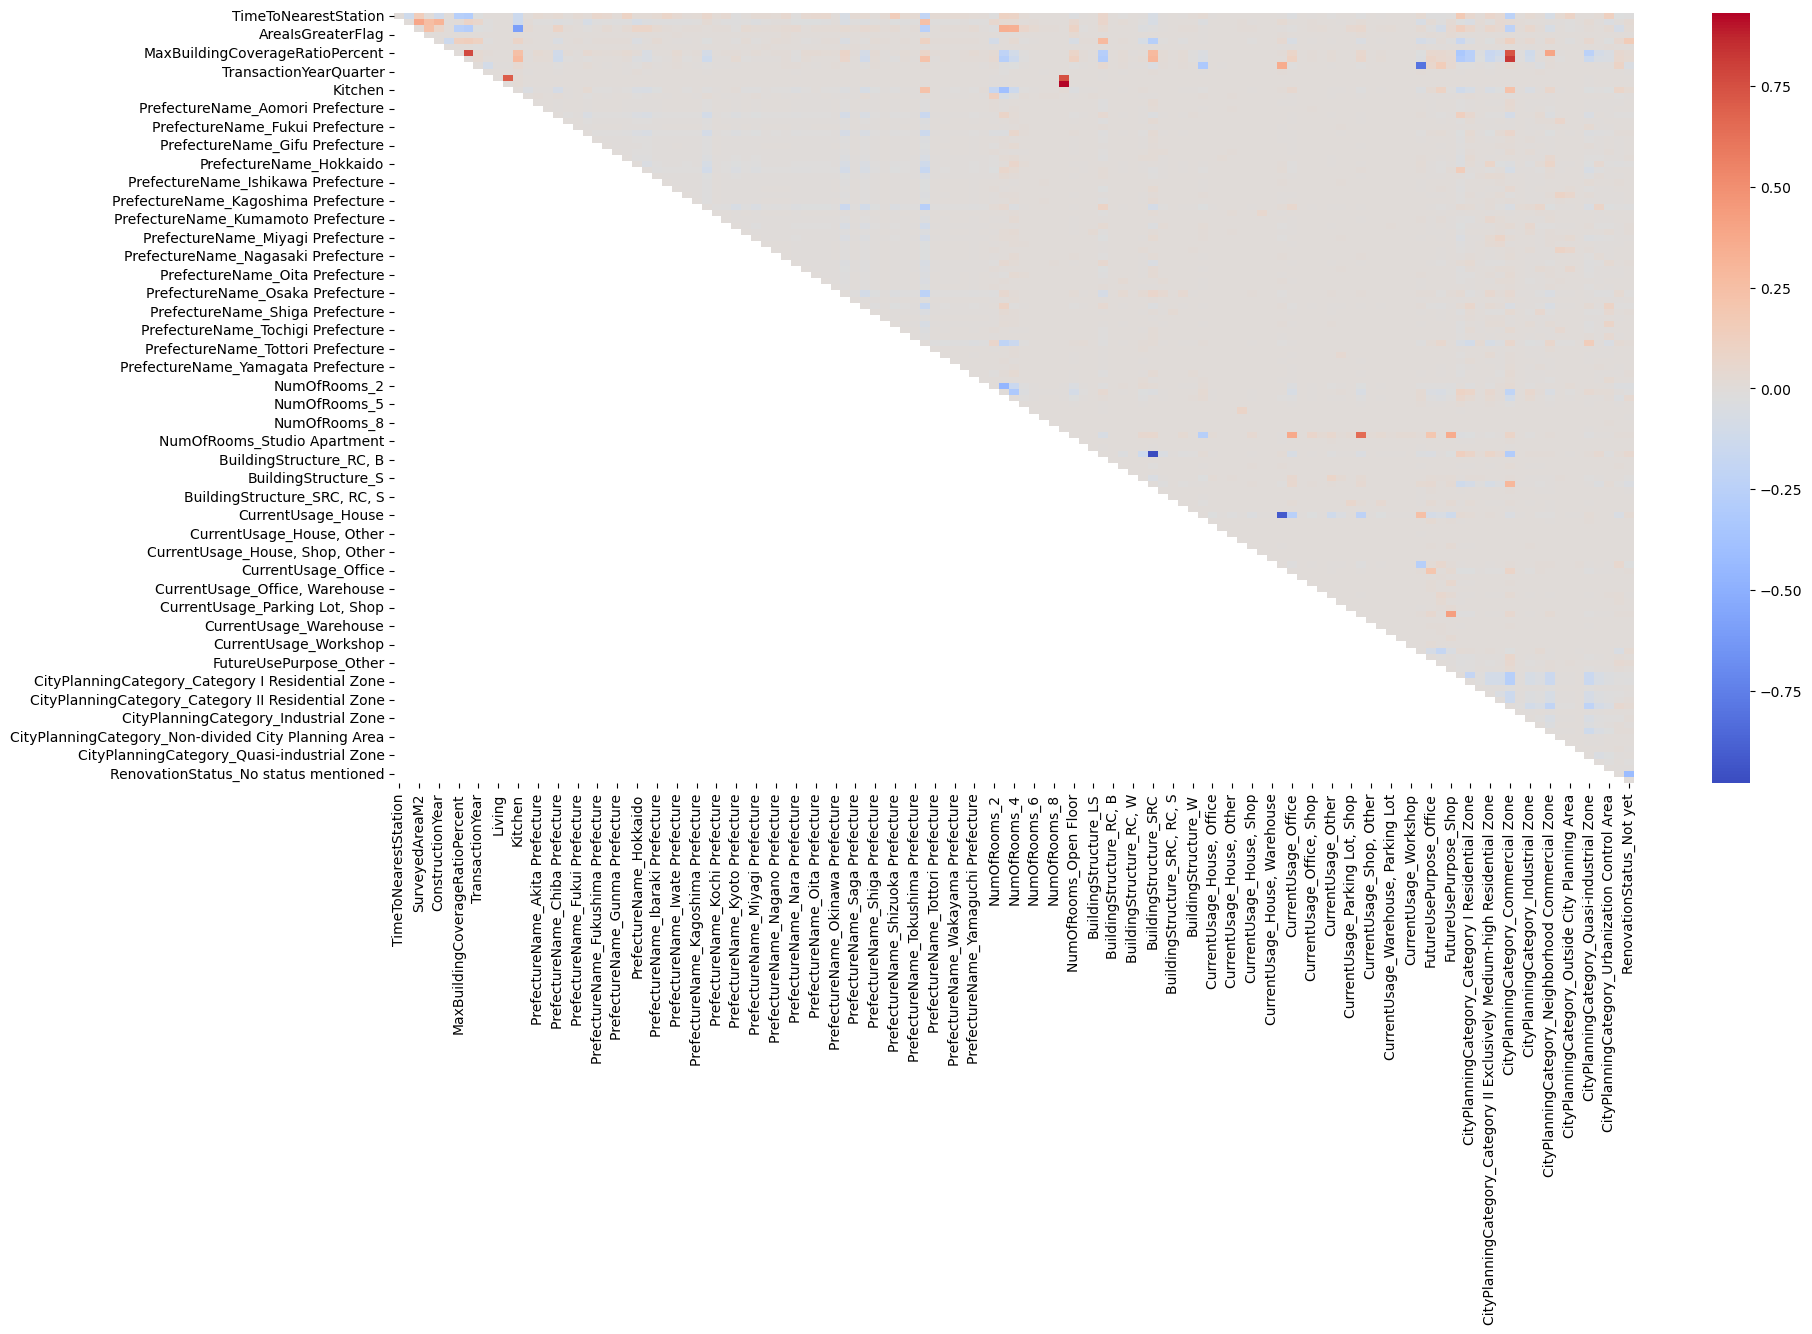

In [70]:
#Converting categorical columns to dummy variables
categorical_columns = ['PrefectureName', 'NumOfRooms', 'BuildingStructure', 'CurrentUsage', 'FutureUsePurpose', 'CityPlanningCategory', 'RenovationStatus']
df_dummies = pd.get_dummies(df, columns=categorical_columns,drop_first=True)


# Correlation matrix
correlation_matrix = df_dummies.corr()

# Diagonal creation
diagonal_corr_matrix = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
diagonal_corr_matrix = diagonal_corr_matrix.fillna(0)

# Print the diagonal correlation matrix
#print(diagonal_corr_matrix)

# Heatmap
plt.figure(figsize=(20, 10))
mask = np.triu(np.ones_like(diagonal_corr_matrix, dtype=bool))
sns.heatmap(diagonal_corr_matrix, annot=False, cmap='coolwarm', cbar=True, mask=~mask)
plt.show()

More analysis and Iteration are required for clear understanding of the correlations

# Univariate Analysis

Let us look at certain patterns with in our Data. For now looking at the various distributions of variables and their count

In [71]:
df.select_dtypes(["float", "int"]).columns

Index(['TimeToNearestStation', 'TradePriceYen', 'SurveyedAreaM2',
       'AreaIsGreaterFlag', 'ConstructionYear', 'PrewarBuildingFlag',
       'MaxBuildingCoverageRatioPercent', 'MaxFloorAreaRatioPercent',
       'TransactionYear', 'TransactionYearQuarter', 'Living', 'Dining',
       'Kitchen', 'Storage'],
      dtype='object')

In [72]:
df.select_dtypes(["object"]).columns

Index(['PrefectureName', 'BuildingStructure', 'CurrentUsage',
       'FutureUsePurpose', 'CityPlanningCategory', 'RenovationStatus',
       'NumOfRooms'],
      dtype='object')

In [84]:
numeric_cols=['TimeToNearestStation', 'SurveyedAreaM2', 'ConstructionYear','TransactionYear', 'TransactionYearQuarter']

In [74]:
categorical_cols =['PrefectureName', 'BuildingStructure', 'CurrentUsage',
       'FutureUsePurpose', 'CityPlanningCategory', 'RenovationStatus']

In [75]:
binary_cols = ['AreaIsGreaterFlag','PrewarBuildingFlag']

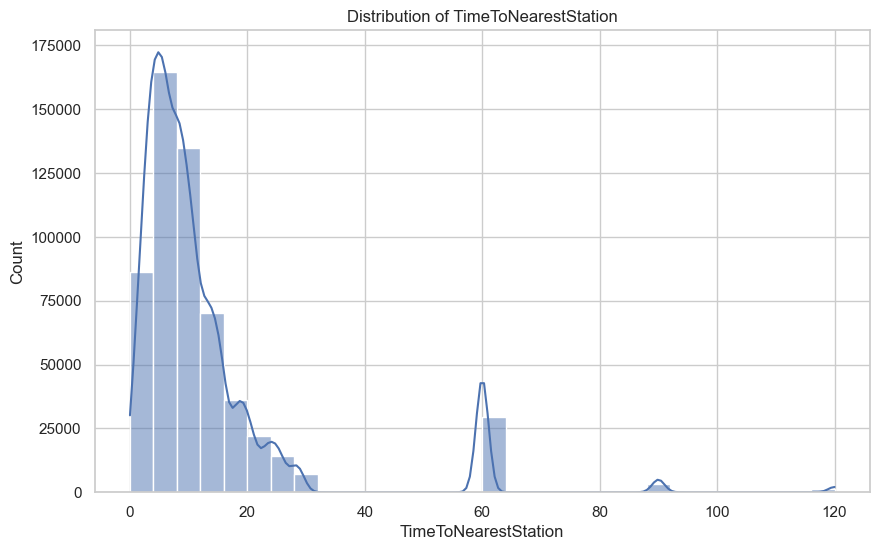

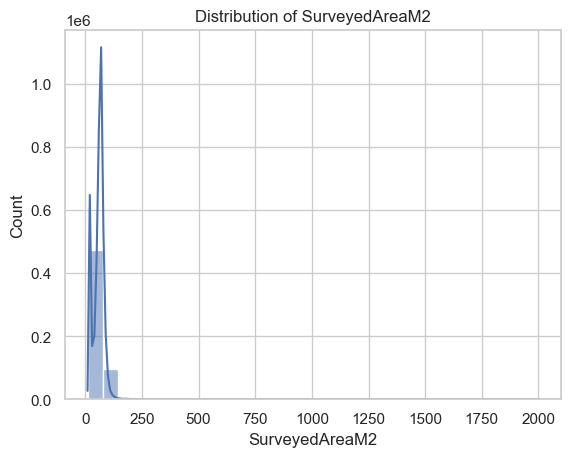

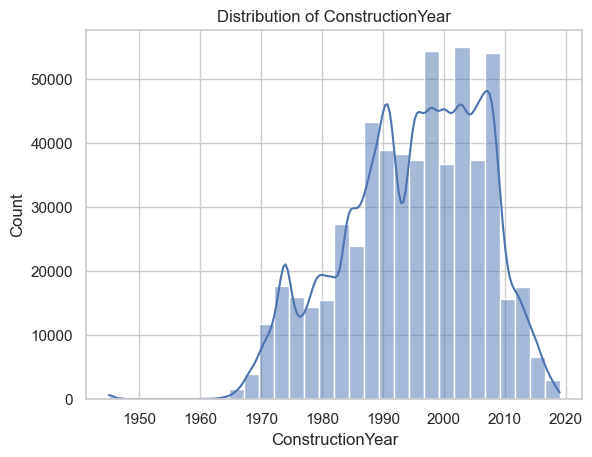

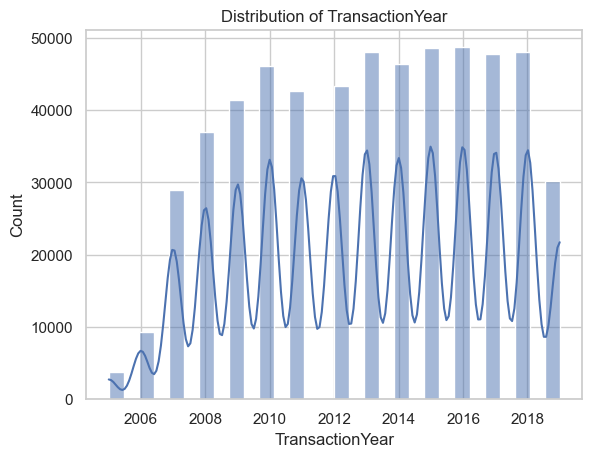

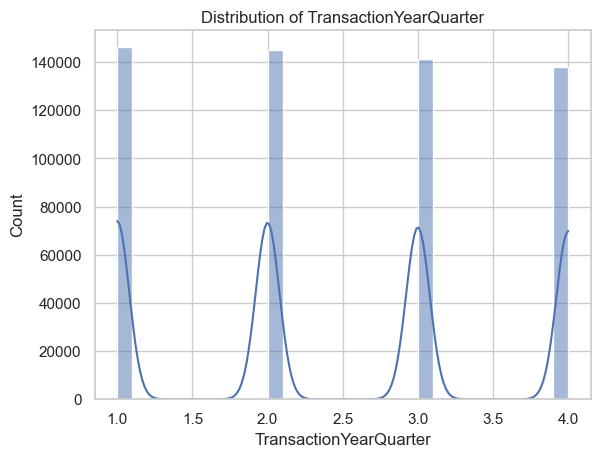

In [85]:
plt.figure(figsize=(10, 6))
for col in numeric_cols:
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

**Analysis:**
1. Looks like most of the condos take around 30 minutes to the nearest station and there is a spike at 1hr to nearest station,also for 1 1/2 hrs and 3 hrs.
2. Most of the condos have an area below 250m2
3. Construction year of condos ranges from 1965 to 2020 and with the highest being at just before and after 2000.
4. Most no of condos were bought in 2016 and lowest in 2005
5. Quaterly dstribution of Transactions look  almost uniform

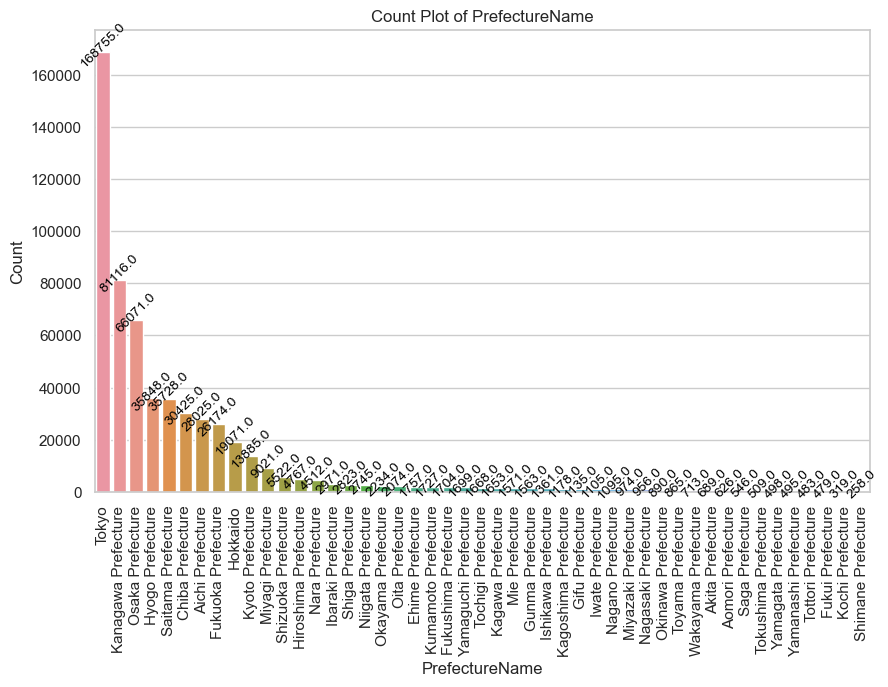

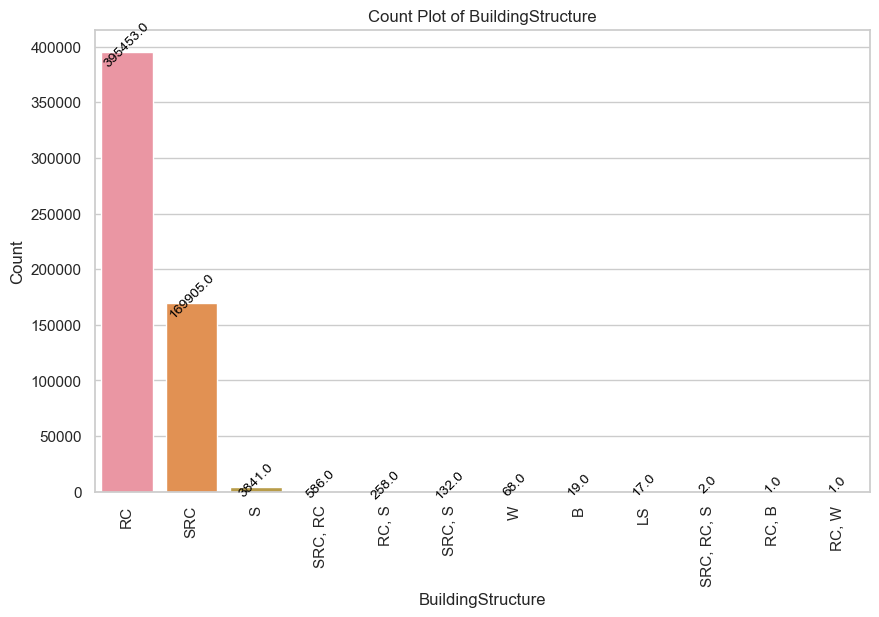

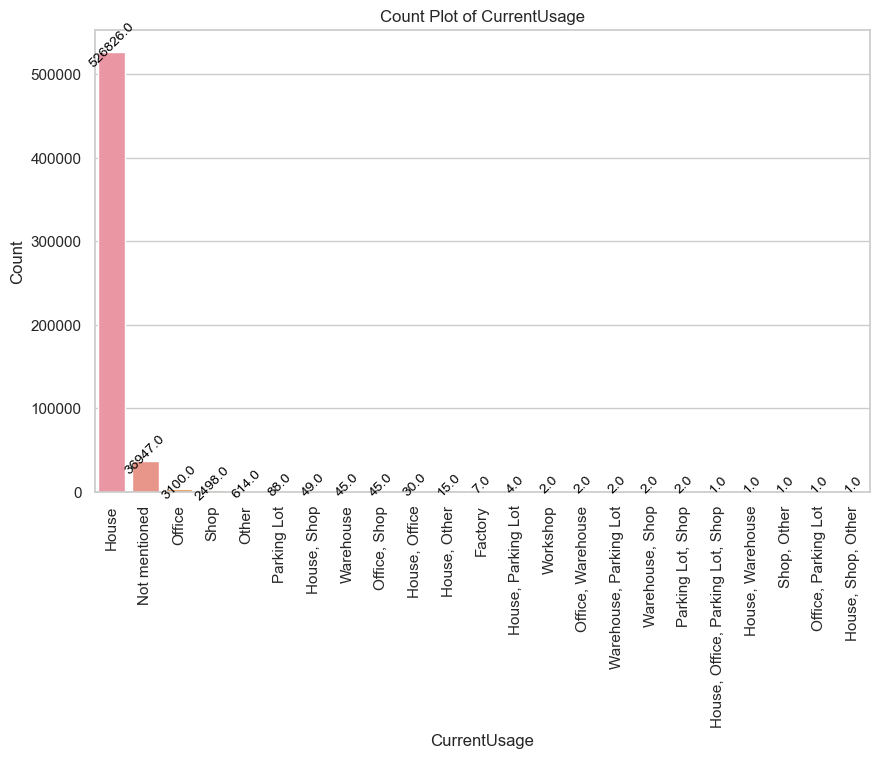

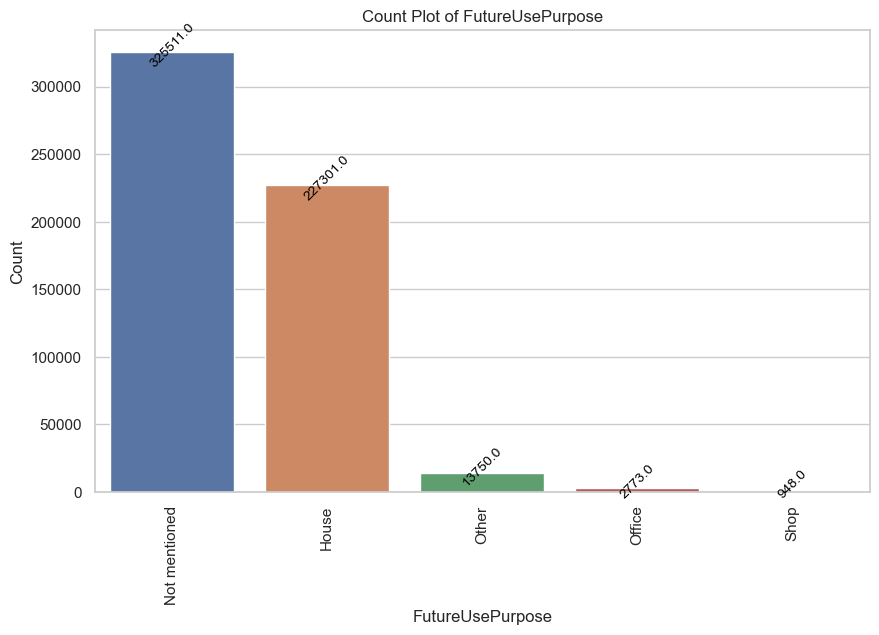

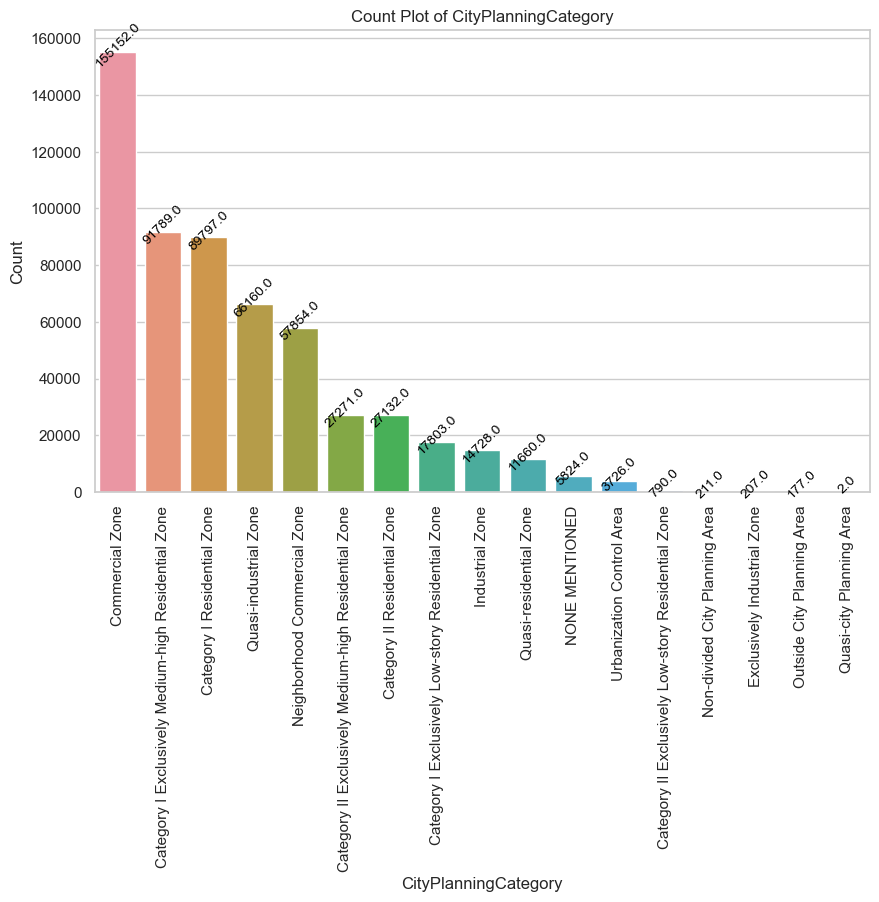

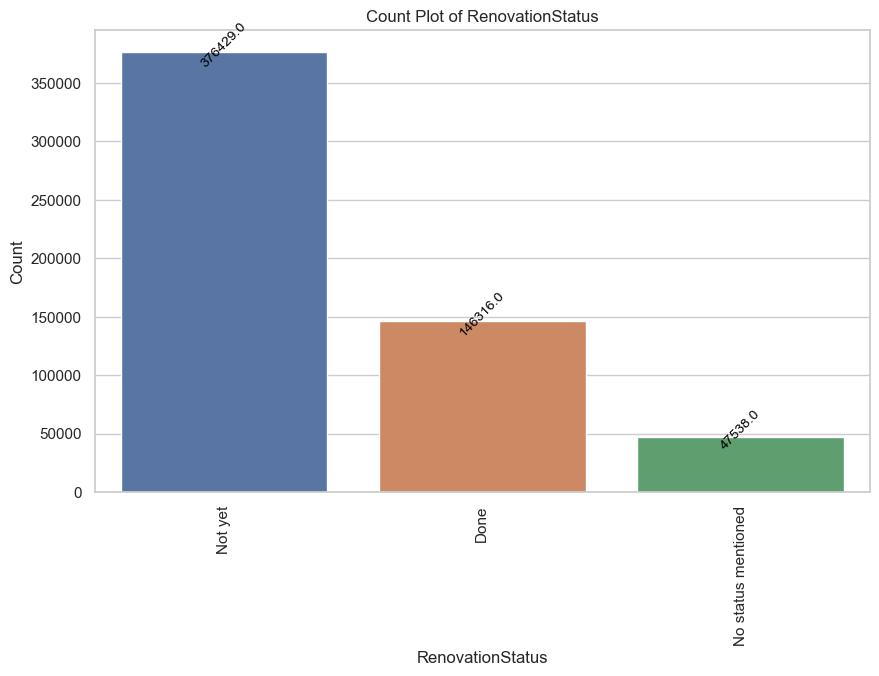

In [77]:
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    # Adding count labels above the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points', rotation=45)
    
    plt.xticks(rotation=90)
    plt.show()

**Analysis:**
1. Highest number of units are in Tokyo and lowest in Shimane prefecture
2. Most of the units has a Reinforced Concrete structure.
3. Most of the units are currenty used as houses.
4. Here most of the units are to be used as houses with very few as Office, shops, and others.
5. Most of the units are in Commercial Zone areas and with least being in Quasi-city Planning Area
6. Most of the units are not renovated.

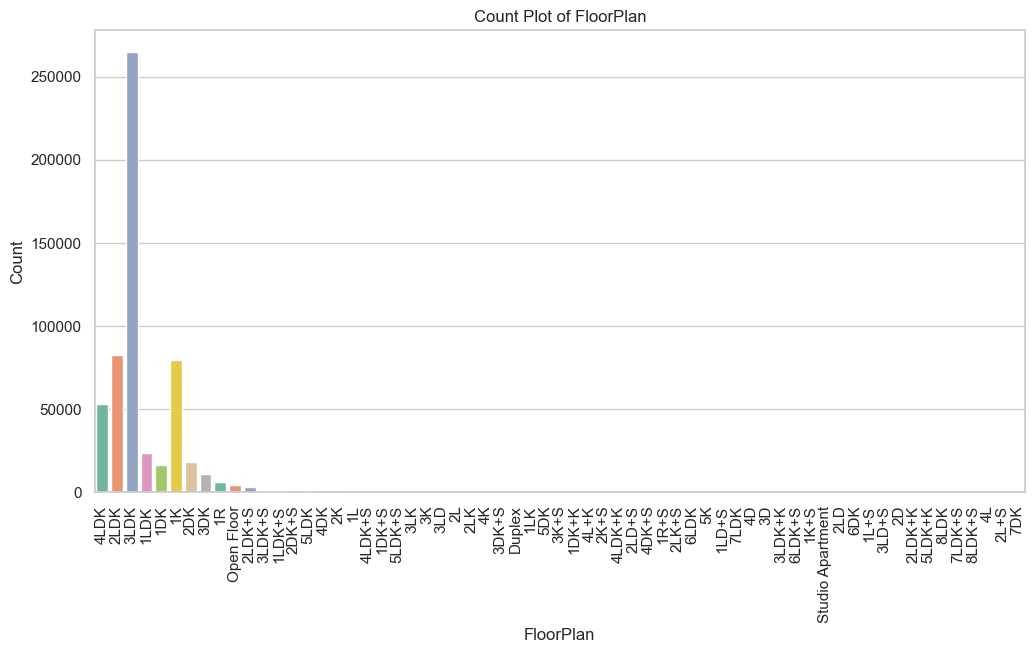

In [78]:
# Creating a count plot for 'FloorPlan'
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
sns.countplot(data=floorplan_tradeprice_df, x='FloorPlan', palette='Set2')
plt.title('Count Plot of FloorPlan')
plt.xlabel('FloorPlan')
plt.ylabel('Count')
plt.xticks(rotation=90)
#plt.savefig(f'Count of Floorplans.png',dpi=200,bbox_inches='tight')
plt.show()

**Analysis:**

As you can see from the plot most of the structures are 3 rooms, 1 dining, 1 kitchen,1 Living, spaces. 4LDK,2LDK,3LDK,1LDK,1K,1DK,2DK,3DK,1R,2LDK+Sand Open floor are the most popular floor plans.


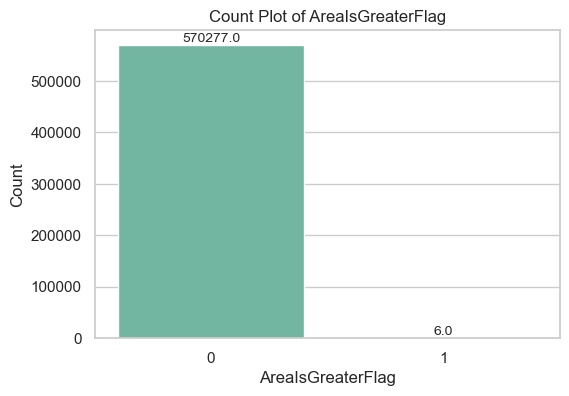

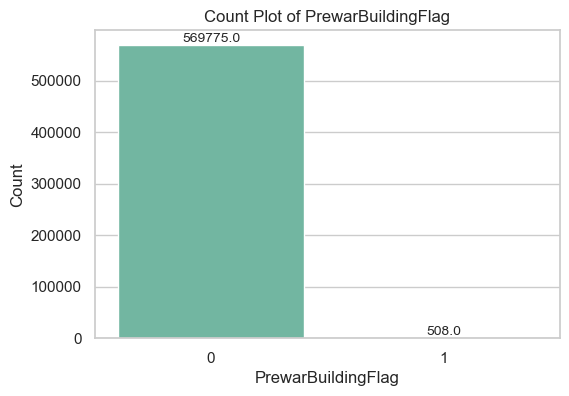

In [79]:
for col in binary_cols:
    plt.figure(figsize=(6, 4))
    sns.set_style('whitegrid')  # Add a grid to the plot
    ax = sns.countplot(data=df, x=col, palette='Set2')
    
    # Count
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)
    
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


**Analysis:**

1. An area of 2000 m^2 or greater, the area data are displayed 2000, and this flag is true. ANd so, from the graph we can see very few such units exist.
2. There are about 508 units that was built before war.

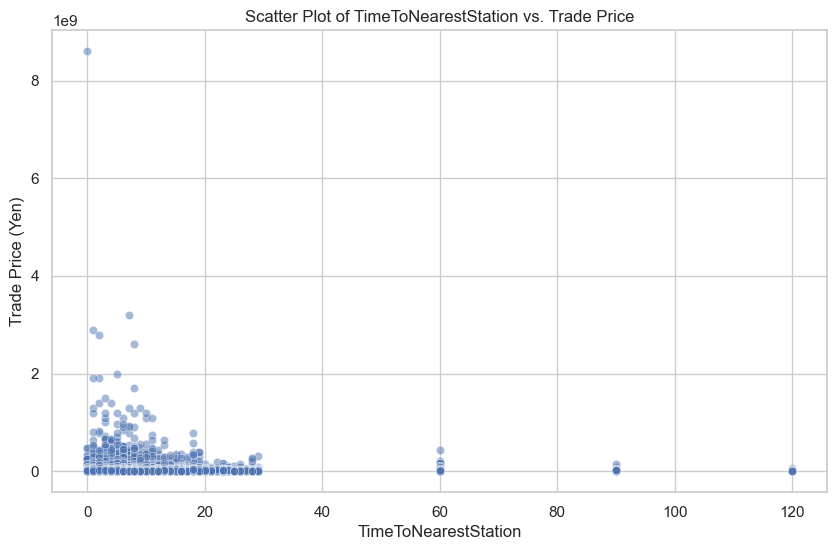

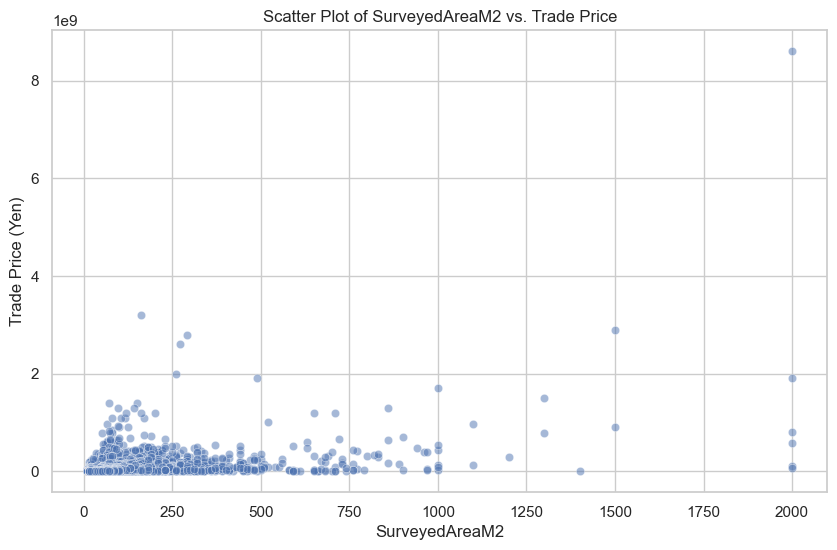

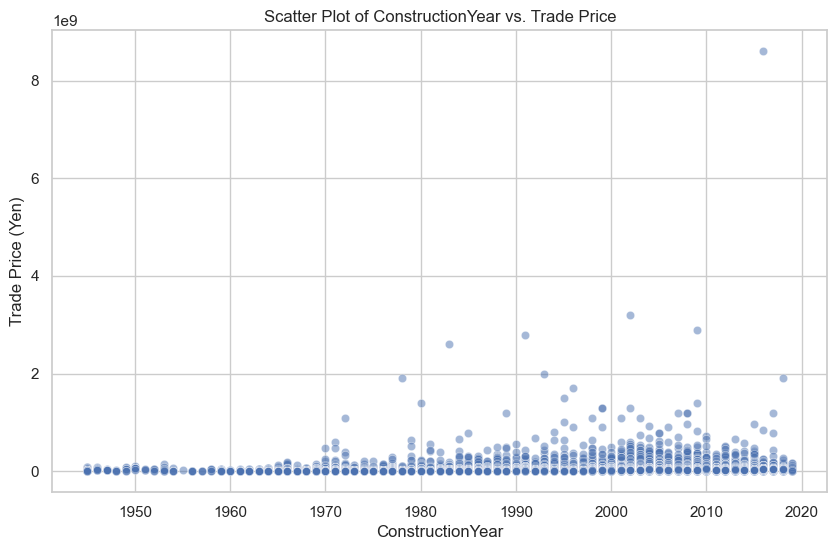

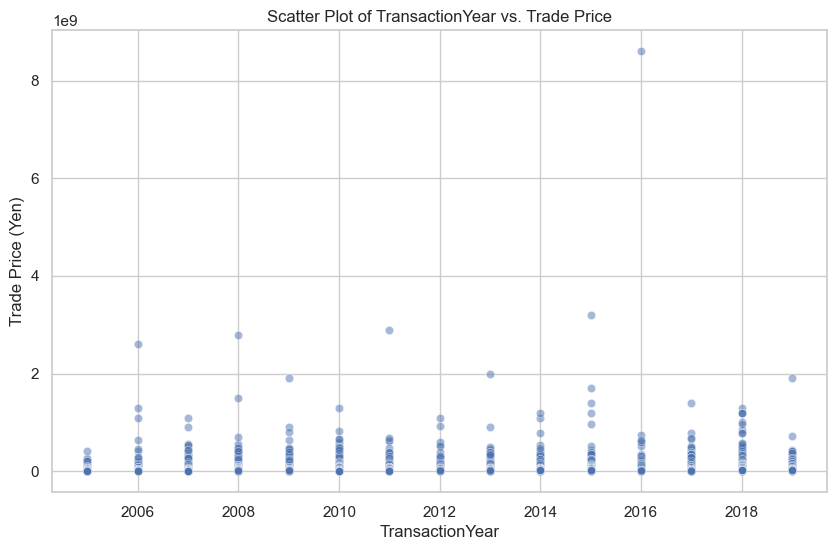

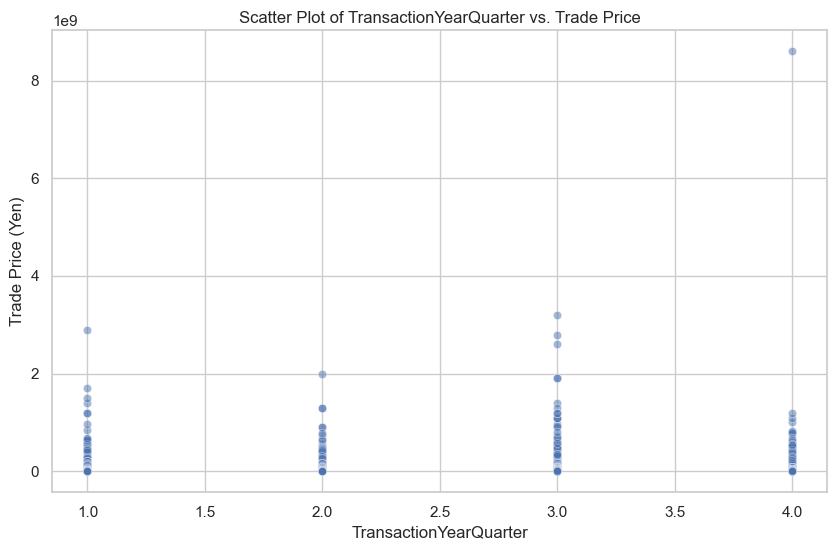

In [86]:
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=col, y='TradePriceYen', alpha=0.5)
    plt.title(f'Scatter Plot of {col} vs. Trade Price')
    plt.xlabel(col)
    plt.ylabel('Trade Price (Yen)')
    #plt.savefig(f'Scatter Plot of {col} vs. Trade Price.png',dpi=200,bbox_inches='tight')
    plt.show()


**Analysis:**

1. As you can see from the scatter plot, units that have closer to a station are sold more and they are sold at more expensive prices,ranging from 0mins to 30 mins. Also has few values at 1 hr,90 mins and 120 mins.
2. Most of the units sold have an area below 500m2 and are the least expensive but there are quiet a few outliers. Interesting to note the price of larger spaces are not high as expected.This can be because they may not be houses and may be used as offices,shops etc.
3. It is clearly visible that the newer the unit the more expensive it gets and the more it gets sold.
4. (This plot isn't very clear should work on this plot further to understand it.)
4. Most of the units are bought in the third quarter interestingly. But the price ranges doesn't look that different.

C:\Users\Thekku\AppData\Local\Temp\ipykernel_2952\527699593.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='TradePriceYen', ci=None)


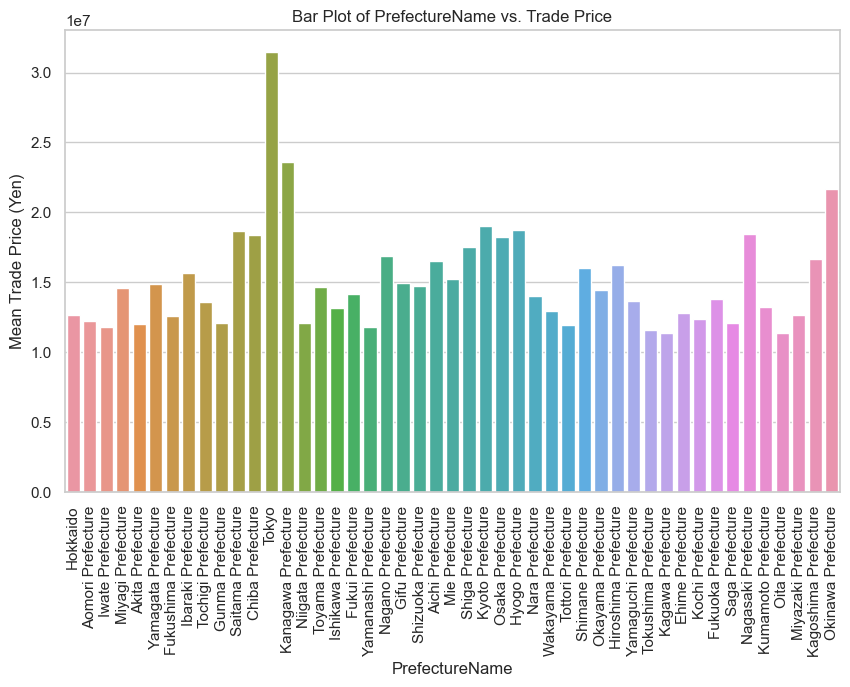

C:\Users\Thekku\AppData\Local\Temp\ipykernel_2952\527699593.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='TradePriceYen', ci=None)


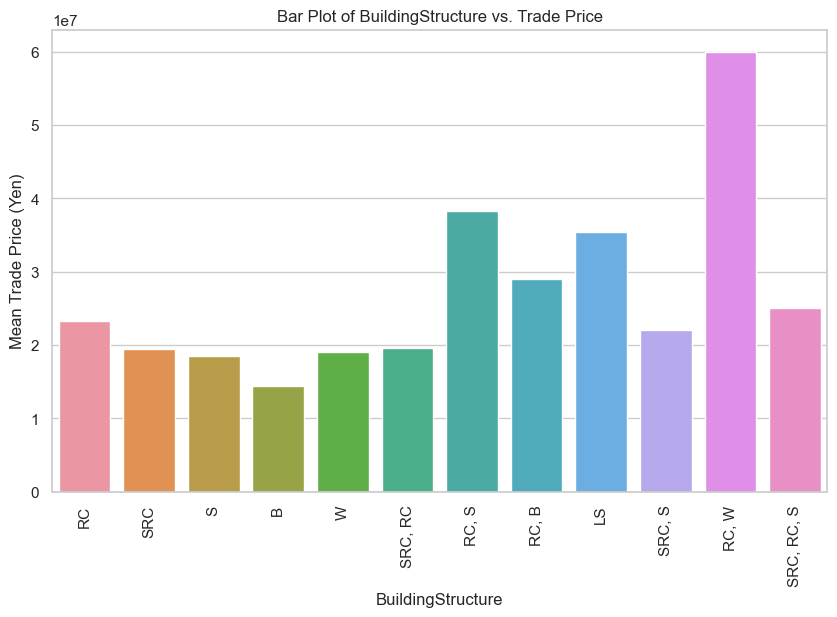

C:\Users\Thekku\AppData\Local\Temp\ipykernel_2952\527699593.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='TradePriceYen', ci=None)


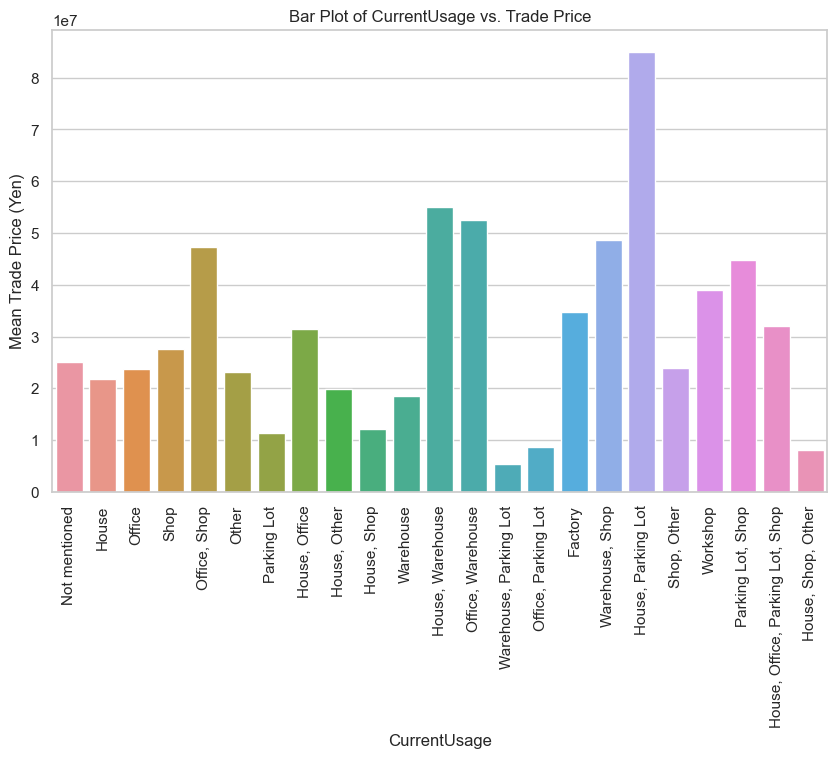

C:\Users\Thekku\AppData\Local\Temp\ipykernel_2952\527699593.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='TradePriceYen', ci=None)


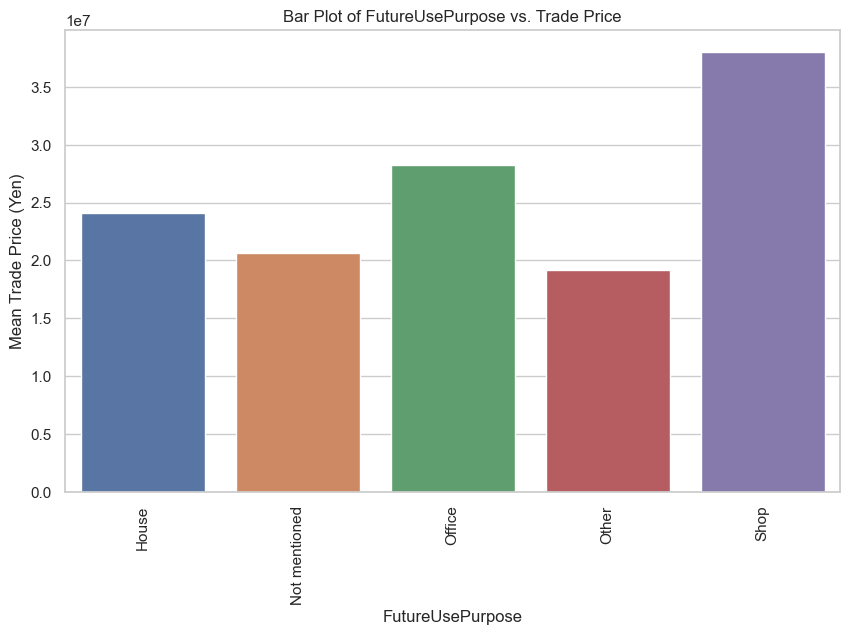

C:\Users\Thekku\AppData\Local\Temp\ipykernel_2952\527699593.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='TradePriceYen', ci=None)


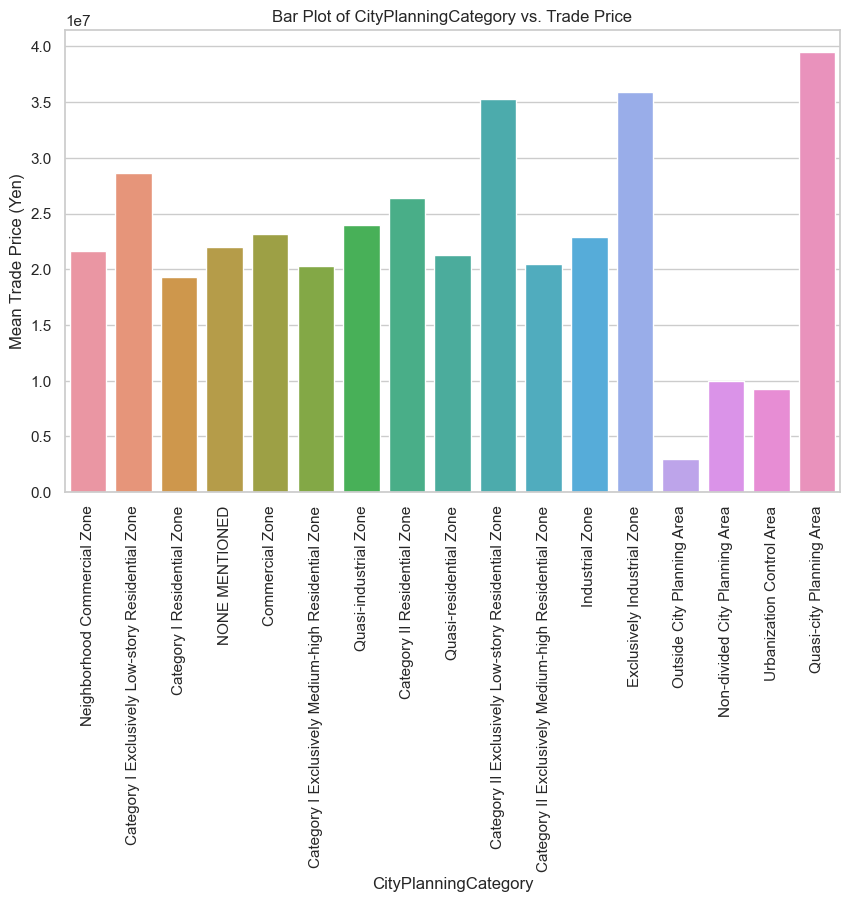

C:\Users\Thekku\AppData\Local\Temp\ipykernel_2952\527699593.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='TradePriceYen', ci=None)


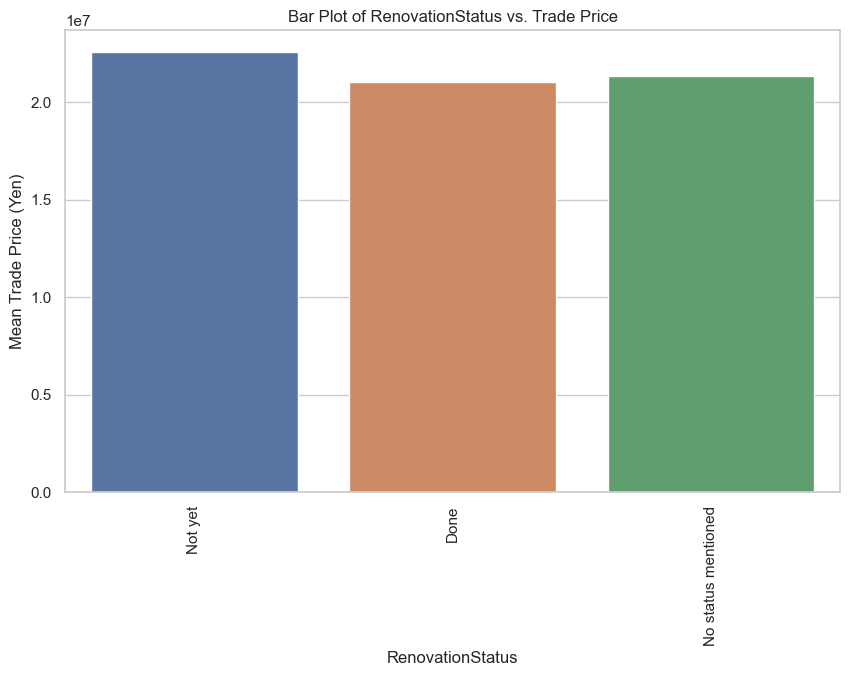

In [81]:
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x=col, y='TradePriceYen', ci=None)
    plt.title(f'Bar Plot of {col} vs. Trade Price')
    plt.xlabel(col)
    plt.ylabel('Mean Trade Price (Yen)')
    plt.xticks(rotation=90)
    #plt.savefig(f'Bar Plot of {col} vs. Trade Price.png',dpi=200,bbox_inches='tight')
    plt.show()


**Analysis:**

1. As expected Tokyo has the highest prices.
2. Looks like the most expensive are are in reinforced concrete + wooden category.
3. Houses with parking lots are the most expensive and the least expensive are warehouse with parking lot.
4. Incase of future use shops have the highest prices. Surprisingly, houses are just the third highest.
5. Quasi -city planning area has the most expensive prices but from one of the previous plots we saw that it is the least sold. This clearly explains why they are sold less. Outside city planning area has the cheapest prices.
6. (Have to understand this more clearly)

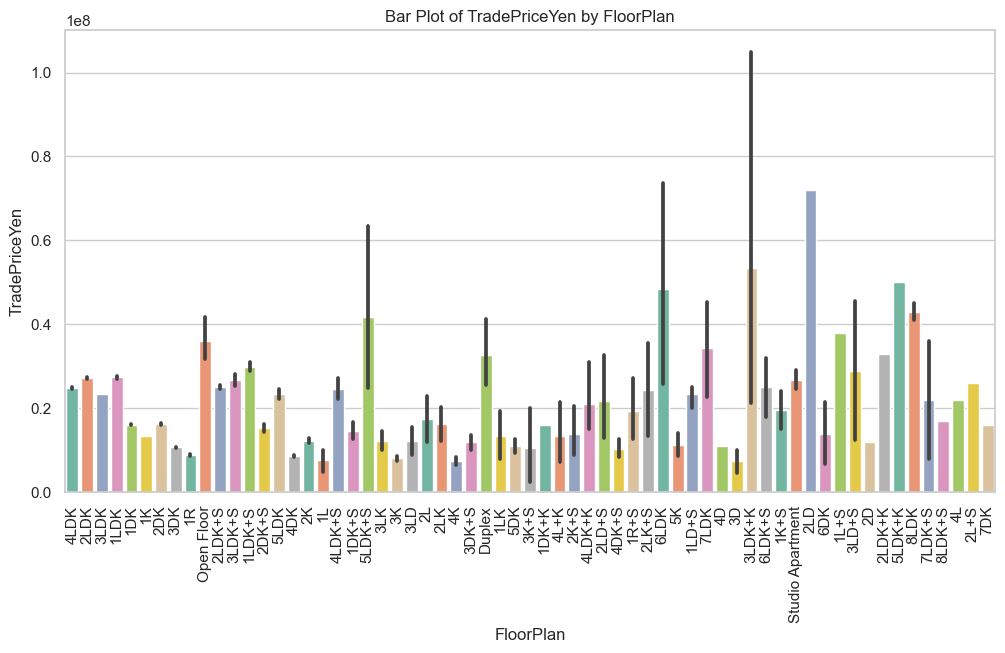

In [82]:
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
sns.barplot(data=floorplan_tradeprice_df, x='FloorPlan', y='TradePriceYen', palette='Set2')
plt.title('Bar Plot of TradePriceYen by FloorPlan')
plt.xlabel('FloorPlan')
plt.ylabel('TradePriceYen')
plt.xticks(rotation=90)
#plt.savefig(f'BarChart of FloorPlan and Trade Price.png',dpi=200,bbox_inches='tight')
plt.show()


**Analysis:**

3LDK + K has a high variability in the data and shows uncertainity. The longer error bar indicates a larger spread or variation in the trade prices for properties with the same floor plan. Surprisingly the most expensive are 2LDs floor plan.

C:\Users\Thekku\AppData\Local\Temp\ipykernel_2952\1618685330.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='TradePriceYen', ci=None)


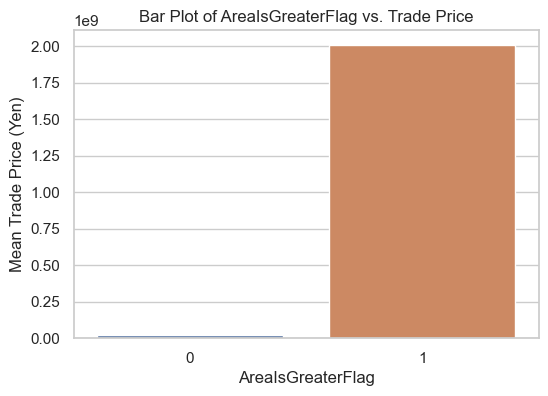

C:\Users\Thekku\AppData\Local\Temp\ipykernel_2952\1618685330.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='TradePriceYen', ci=None)


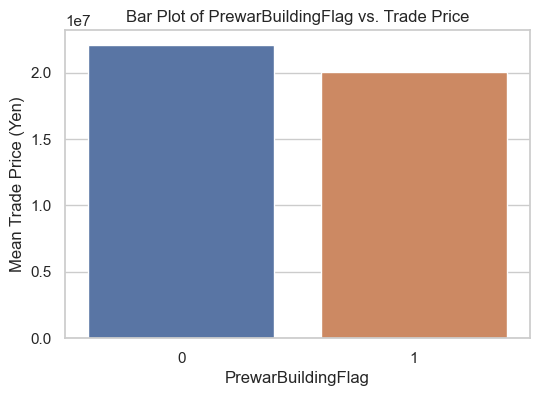

In [83]:
# Create bar plots for binary columns
for col in binary_cols:
    plt.figure(figsize=(6, 4))
    sns.barplot(data=df, x=col, y='TradePriceYen', ci=None)
    plt.title(f'Bar Plot of {col} vs. Trade Price')
    plt.xlabel(col)
    plt.ylabel('Mean Trade Price (Yen)')
    plt.show()

**Analysis:**
1. Area greater than 2000m2 are more expensive.
2. Prewars buildings and the others doesn't seem to have much of a difference in the Prices.


# Summary

In this Jupyter notebook, I conducted a analysis of a real estate dataset focused on Japan pre-owned condos and other categories. The analysis included data cleaning, transformation, and visualization. I explored the impact of various features, such as property type and construction year, on real estate prices. The analysis culminated in visualizations and insights aimed at understanding the real estate market in Japan, with a focus on trade prices.